Previsão de Renda
---

<br>

LinkedIn: [Willian Campos](https://www.linkedin.com/in/willian-campos-498550b2/)

# **Tópicos**
---

<ol type="1">
  <li>Entendimento do Negócio</li>
  <li>Entendimento dos Dados</li>
  <li>Preparação dos Dados</li>  
  <li>Modelagem</li>
  <li>Conclusões</li>
</ol>







# Etapa 1 Crisp - DM: Entendimento do negócio

Este é um projeto com objetivo de criar um modelo preditivo para os valores de renda com base nos demais dados, a renda será declarada no projeto como a variável resposta ou target, as demais informações serão chamadas como variáveis explicativas. Como objetivo secundário, esse projeto vai ser usado como um estudo do modelo CRISP e suas fases, sendo assim os comentários realizados tem não somente a função de ajudar na manutenção e entendimento do código, mas também como uma fonte de aprendizado.

Ao decorrer do projeto todas as informações serão análisadas separadamente, os dados vão ser trabalhados e editados para que fiquem em um formato útil e possam ser aplicados a etapa de modelagem, nessa etapa serão aplicados conceitos estatisticos e de aprendizagem de máquina como Árvore de Decisão (decisionTree) e Árvores Aleatórias (randomForest), além de usar modelos diferentes para o mesmo propósito para comparação de resultado.

# Etapa 2 Crisp-DM: Entendimento dos dados

Os dados usados estão contidos na tabela abaixo, sendo a renda a variável resposta como dito anteriormente, ou seja, é a variável que tentara ser explicada e as demais variáveis vão ser usadas para explicar o comportamento da renda.

### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Data de Referência | Texto|
| id_cliente              |  Número identificador  | Inteiro|
| sexo                    |  M=Masculino / F=Feminino | M/F |
| posse_de_veiculo        |  True=Possui Veículo / False=Não Possuí Veículo | True/False|
| posse_de_imovel         |  True=Possui Imóvel / False=Não Possuí Imóvel | True/False|
| qtd_filhos              |  Quantidade de Filhos | Inteiro |
| tipo_renda              |  Tipo de Renda | Texto |
| educacao                |  Educação | Texto |
| estado_civil            |  Estado Civil | Texto|
| tipo_residencia         |  Tipo de Residência | Texto |
| idade                   |  Idade | Inteiro |
| tempo_emprego           |  Tempo de Emprego | Número Real |
| qt_pessoas_residencia   |  Quantidade de Pessoas na Residência | Número Real |
| renda                   |  Renda | Número Real |

##### Carregando os Pacotes

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport

from scipy.stats import chi2_contingency

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




### Obs foi removido o uso do ProfileReport devido a erros e inconsistencias com as demais bibliotecas, o que estava fazendo com que os gráficos não aparececem

##### Carregando os Dados

In [2]:
df = pd.read_csv("previsao_de_renda.csv") # Carregando o quadro de dados para previsão de rendas
df.head(3) # Visualizando as primeiras 3 linhas

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


## Entendimento dos dados - Univariada

##### O objetivo principal dessa etapa é entender a distribuição dos dados e extrair informações relevantes, para saber o que deve ser modificado e ter um conjunto de dados sem inconsistências para que seja modelado na etapa posterior.

Aqui foi passado o "prof" para receber todas as informações fornecidas pela classe ProfileReport, são informações sobre as caracteristicas da tabela de dados(as colunas) como dados faltantes, desbalanceamento dos dados por categoria, estatisticas, distribuições, etc... Foi passado o minimal=True para que seja carregado apenas as informações mais essenciais.

In [3]:
'''Obs foi removido o uso do ProfileReport devido a erros e inconsistencias com as demais bibliotecas,
o que estava fazendo com que os gráficos não aparececem'''

'''prof = ProfileReport(df, explorative=True, minimal=True)
prof'''

'prof = ProfileReport(df, explorative=True, minimal=True)\nprof'

Ao analisar o profile fornecido, fica fácil de edentificar alguns pontos a ser trabalhados como os valores faltantes de **tempo_emprego** e outros que se deve ter atenção ao extraior informações como algumas categorias que tem o número de amostras baixo em **educacao** e **estado_civil**.

Como a coluna qt_pessoas_residencia está no formato de números reais e futuramente vai precisar
transformar esses valores para modelagem, foi verificado também se os valores únicos são muito abrangentes, mas já deu para ver que são um total de 9 valores únicos.

##### Dados de não interesse

Dados relacionados a sexo foram removidos devido a [Lei geral de Proteção de Dados](https://www.gov.br/cidadania/pt-br/acesso-a-informacao/lgpd#:~:text=A%20Lei%20Geral%20de%20Prote%C3%A7%C3%A3o,da%20personalidade%20de%20cada%20indiv%C3%ADduo.).

Os dados de data_ref e id_cliente foram removidos porque eles não vão ajudar a tirar conclusões, então eles não servem para o propósito dessa análise.

In [4]:
df = df.drop('sexo', axis = 1) # Removendo colunas de não interesse (devido a LGPD)
df = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1) # Colunas que não vão ajudar em nada nas análises
df.head(3) # Mostrando o novo DF

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


##### Verificando os valores ausentes

Após verificar os valores ausentes de tempo_emprego, é possível perceber que são de pessoas que são pensionistas e por isso não tem o tempo de emprego. Os valores futuramente serão alterados para zero, pois apresenta a realidade de tempo emprego dessa pessoa, ajuda no momento de realizar a modelagem onde os valores dos dados vão precisar ser numéricos e fica mais condizente com a realidade, onde pessoas que tem tempo de emprego zero também possuí renda.

Infelizmente isso pode diminuir a relação de tempo_emprego e renda, pois pessoas com tempo_emprego=zero também vão ter renda e as vezes até maiores de quem trabalha, mas isso também fica mais condizente com a realidade.

O que poderia ser feito é uma análise separada dessas pessoas, porém são 17.2% dos dados totais, o que representa uma amostragem muito grande e os demais dados dessas pessoas podem ser valiosos para explicação da renda.

In [5]:
filtro_nulo = df['tempo_emprego'].isnull() # Salvando os valores nulos como True/False
df_nulo_renda = df[filtro_nulo][['tempo_emprego', 'tipo_renda','renda']] # Pegando os valores True(nulos) junto com as demais colunas
df_nulo_renda

,tempo_emprego,tipo_renda,renda
11,NaN,Pensionista,1685.51
12,NaN,Pensionista,6343.52
21,NaN,Pensionista,1649.37
22,NaN,Pensionista,4715.57
23,NaN,Pensionista,799.18
...,...,...,...
14979,NaN,Pensionista,4672.65
14984,NaN,Pensionista,1235.34
14986,NaN,Pensionista,2410.18
14991,NaN,Pensionista,5153.15


##### Análise Estatística Descritiva

Aplicado o describe para tirar informações estátisticas descritivas para as colunas do tipo object(texto) e para o tipo bool(booleano). O transpose cria um gráfico e mostra a quantidade de elementos, quantos tipos ele tem, qual aparece mais e quantas vezes aparece.

Muito provavelmente vários valores das colunas vão ser descartados em um momento de análise de relevância, pois a frequência de outros valores são muito predominantes, isso pode ser percebido no valor que aparece mais e na sua frequencia em comparação ao total de elementos.

In [6]:
df.select_dtypes(include=['object', 'bool']).describe().transpose()

,count,unique,top,freq
posse_de_veiculo,15000,2,False,9140
posse_de_imovel,15000,2,True,10143
tipo_renda,15000,5,Assalariado,7633
educacao,15000,5,Secundário,8895
estado_civil,15000,5,Casado,10534
tipo_residencia,15000,6,Casa,13532


Similar ao que foi feito em cima, também temos informações estátisticas descritivas, porém aqui temos os valores numéricos com a quantidade de elementos, média, desvio padrão, minimo/máximo e seus quartis.

Aqui já conseguimos tirar algumas informações bem importantes, como o desvio padrão da renda que é maior do que a própria média, o que indica que tem muito outliers (valores muito destintos da média) e que pode ser comprovado no valor máximo de 245141.67. Tem alguns outros valores bem distintos no máximo como a quantidade de filhos, quantidade de pessoas na residência ou o tempo de emprego, porém esses valores ainda tem seu desvio padrão mais controlado, levando em consideração que muitas pessoas tem zero filhos.

In [7]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,15000.0,0.432333,0.746631,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.882333,11.273155,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12427.0,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849
qt_pessoas_residencia,15000.0,2.206400,0.909792,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,5697.287057,8266.816289,118.710000,2026.110000,3499.720000,6392.167500,245141.670000


### Variáveis Categóricas

#### Para os dados categóricos foi verificado a média e desvio padrão em seus valores proporcionais em uma faixa de 1000 em 1000 até 8999 e depois de 9000 até o máximo, com a proporção de valores e a margem de renda, podemos observar se o valor de renda aumenta ou diminui e até verificar se as variáveis tem alguma correlação. Com o desvio padrão é possível verificar as variáveis que são mais estáveis, levando sempre em consideração uma proporção de amostragem no mínimo razoavel.

##### Para gerar gráficos mais informativos criei essa função para definir intervalos de renda, assim pode ser gerado os mesmo gráficos para varias faixas de valores de renda em diferentes categorias. (apesar que pode ser usado para gerar outros intervalos sem ser de renda)

In [8]:
def gerar_intervalos_e_rotulos(margem, limite):
    
    ''' Aqui é um verificador para que não sobre a margem na hora de adicionar o ultimo elemento,
    então se fosse sobrar margem, aqui aumenta o limite para a divisao de limite e margem de zero
    independente do valor que for passado para eles.'''
    if limite % margem != 0: # Verifica resto da divisão
        limite_c_margem = (limite - (limite % margem)) + margem # Altera para o próximo valor divisivel por margem
    else:
        limite_c_margem = limite # Mantem o valor caso a divisão seja inteira

    i = 0 
    intervalos = []
    rotulos = []

    while i <= limite_c_margem:
        intervalos.append(i) # Adiciona os valores de intervalo de acordo com a margem
        ''' Esse if serve para verificar o ultimo elemento do rotulo e colocar o simbolo de 
        infinito para cima que é o "+" caso caia no else'''
        if i < limite_c_margem:
            rotulos.append(f'{i}-{i + margem}') # Adiciona os rotulos, exemplo 500-1000 ou 300-600
        else:
            rotulos.append(f'{i}+') # Adiciona o ultimo elemento do rotulo e o simbolo +, define sem limite superior
        i = i + margem
    intervalos.append(float('inf')) # Adiciona por ultimo 'inf' que é infinito, sem limite superior
    
    return intervalos, rotulos # Retorna as listas

# Testando pra ver se deu certo
intervalos, rotulos = gerar_intervalos_e_rotulos(500, 5000)
print(intervalos)
print(rotulos)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, inf]
['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000+']


#### Posse de Veículo

Foi gerado uma tabela de informaçõs cruzadas de posse_de_veiculo e renda usando os intervalos criados pela função, essa tabela foi usada também para gerar o gráfico com a frequencia e a renda de cada intervalo. Logo abaixo então tem os valores de média e desvio padrão.

In [9]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['posse_de_veiculo'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
posse_de_veiculo,,,,,,,,,,,
False,637,1936,1836,1253,800,578,471,303,227,1099,9140
True,241,871,925,805,533,466,368,290,212,1149,5860
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


##### Valores Proporcionais

O número de pessoas que tem veículo tende a aumentar conforme a renda, essa variável provavelmente será relevante para a análise.

In [10]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['posse_de_veiculo'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
posse_de_veiculo,,,,,,,,,,,
False,72.55%,68.97%,66.50%,60.88%,60.02%,55.36%,56.14%,51.10%,51.71%,48.89%,60.93%
True,27.45%,31.03%,33.50%,39.12%,39.98%,44.64%,43.86%,48.90%,48.29%,51.11%,39.07%


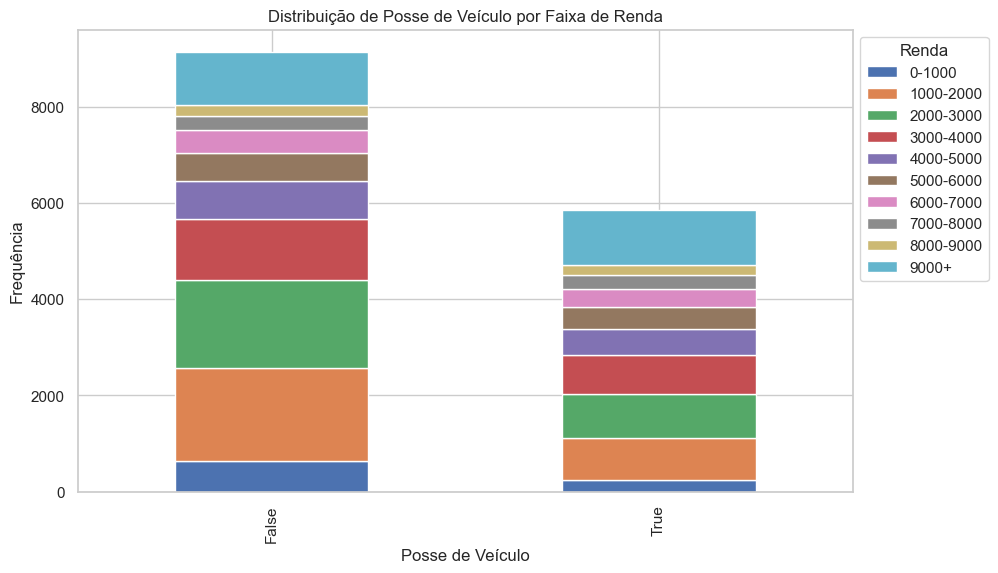

In [11]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('Posse de Veículo')
ax.set_title('Distribuição de Posse de Veículo por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

#### Média e desvio padrão das pessoas que tem e não tem veículo

In [12]:
media_true = df_clone[df_clone['posse_de_veiculo'] == True]['renda'].mean()
media_false = df_clone[df_clone['posse_de_veiculo'] == False]['renda'].mean()
std_true = df_clone[df_clone['posse_de_veiculo'] == True]['renda'].std()
std_false = df_clone[df_clone['posse_de_veiculo'] == False]['renda'].std()
print(f'Possui Veículo - Média: {media_true} / Desvio Padrão: {std_true}\n')
print(f'Não Possui Veículo - Média: {media_false} / Desvio Padrão: {std_false}\n')

Possui Veículo - Média: 6734.7721672354955 / Desvio Padrão: 9426.710705638976

Não Possui Veículo - Média: 5032.116077680525 / Desvio Padrão: 7352.416156933616



#### Posse de Imóvel

In [13]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['posse_de_imovel'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
posse_de_imovel,,,,,,,,,,,
False,336,944,884,635,440,325,257,167,149,720,4857
True,542,1863,1877,1423,893,719,582,426,290,1528,10143
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


##### Valores Proporcionais

Os valores estão bem equilibrados e provavelmente não vão ser relevantes, ou seja, não explicam muito bem a renda. Se levarmos em consideração apenas a tabela comum, passa a impressão de que os valores vão diminuindo, porém olhando os valores proporcionais da para perceber se a proporção se mantem.

In [14]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['posse_de_imovel'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
posse_de_imovel,,,,,,,,,,,
False,38.27%,33.63%,32.02%,30.86%,33.01%,31.13%,30.63%,28.16%,33.94%,32.03%,32.38%
True,61.73%,66.37%,67.98%,69.14%,66.99%,68.87%,69.37%,71.84%,66.06%,67.97%,67.62%


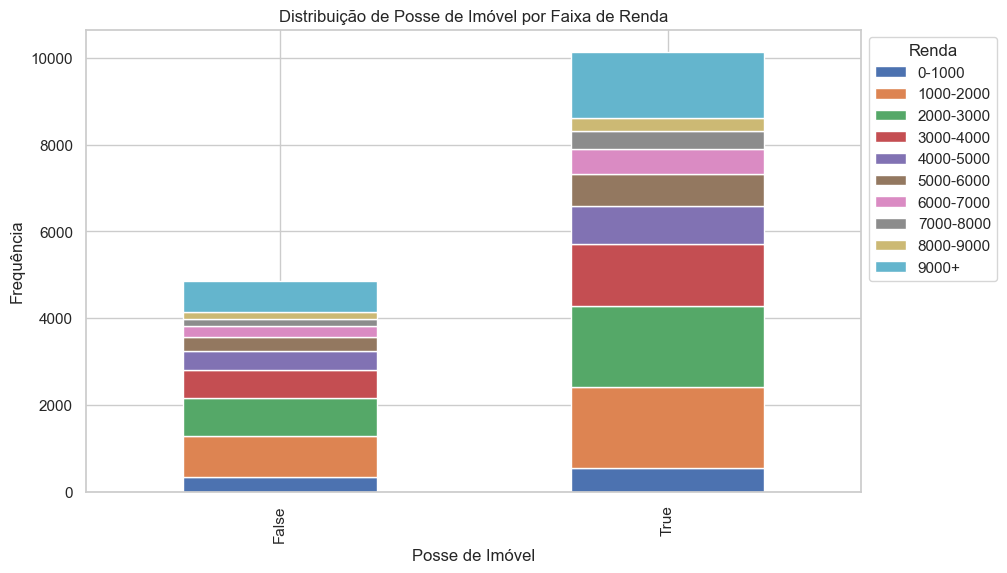

In [15]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('Posse de Imóvel')
ax.set_title('Distribuição de Posse de Imóvel por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

#### Média e desvio padrão das pessoas que tem e não tem imóvel

In [16]:
media_true = df_clone[df_clone['posse_de_imovel'] == True]['renda'].mean()
media_false = df_clone[df_clone['posse_de_imovel'] == False]['renda'].mean()
std_true = df_clone[df_clone['posse_de_imovel'] == True]['renda'].std()
std_false = df_clone[df_clone['posse_de_imovel'] == False]['renda'].std()
print(f'Possui Imóvel - Média: {media_true} / Desvio Padrão: {std_true}\n')
print(f'Não Possui Imóvel - Média: {media_false} / Desvio Padrão: {std_false}\n')

Possui Imóvel - Média: 5719.480012816721 / Desvio Padrão: 8017.78365324111

Não Possui Imóvel - Média: 5650.940926497838 / Desvio Padrão: 8764.761710768224



#### Tipo de Renda

In [17]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['tipo_renda'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
tipo_renda,,,,,,,,,,,
Assalariado,439,1367,1426,988,671,556,455,292,212,1227,7633
Bolsista,0,0,0,3,2,2,0,1,1,0,9
Empresário,177,597,586,496,322,232,222,163,132,581,3508
Pensionista,198,647,546,422,249,144,106,87,48,135,2582
Servidor público,64,196,203,149,89,110,56,50,46,305,1268
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


##### Valores Proporcionais

Nos valores abaixo também estão com todos valores muito equilibrados e provavelmente vão ser irrelevantes para a modelagem, apenas com o Empresário com um leve aumento e os pensionistas com um leve declinio.

In [18]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['tipo_renda'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
tipo_renda,,,,,,,,,,,
Assalariado,50.00%,48.70%,51.65%,48.01%,50.34%,53.26%,54.23%,49.24%,48.29%,54.58%,50.89%
Bolsista,0.00%,0.00%,0.00%,0.15%,0.15%,0.19%,0.00%,0.17%,0.23%,0.00%,0.06%
Empresário,20.16%,21.27%,21.22%,24.10%,24.16%,22.22%,26.46%,27.49%,30.07%,25.85%,23.39%
Pensionista,22.55%,23.05%,19.78%,20.51%,18.68%,13.79%,12.63%,14.67%,10.93%,6.01%,17.21%
Servidor público,7.29%,6.98%,7.35%,7.24%,6.68%,10.54%,6.67%,8.43%,10.48%,13.57%,8.45%


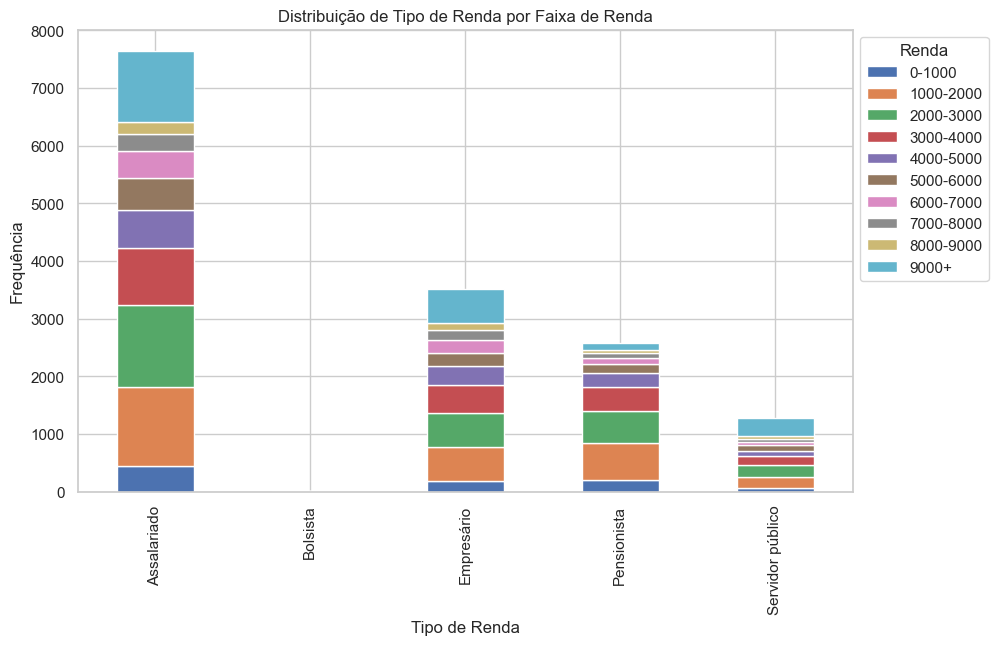

In [19]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('Tipo de Renda')
ax.set_title('Distribuição de Tipo de Renda por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

#### Média e desvio padrão do tipo de renda

In [20]:
# Assalariado
media_assalariado = df_clone[df_clone['tipo_renda'] == 'Assalariado']['renda'].mean()
std_assalariado = df_clone[df_clone['tipo_renda'] == 'Assalariado']['renda'].std()
print(f'Assalariado - Média: {media_assalariado} / Desvio Padrão: {std_assalariado}\n')

# Bolsista
media_bolsista = df_clone[df_clone['tipo_renda'] == 'Bolsista']['renda'].mean()
std_bolsista = df_clone[df_clone['tipo_renda'] == 'Bolsista']['renda'].std()
print(f'Bolsista - Média: {media_bolsista} / Desvio Padrão: {std_bolsista}\n')

# Empresario
media_empresario = df_clone[df_clone['tipo_renda'] == 'Empresário']['renda'].mean()
std_empresario = df_clone[df_clone['tipo_renda'] == 'Empresário']['renda'].std()
print(f'Empresário - Média: {media_empresario} / Desvio Padrão: {std_empresario}\n')

# Pensionista
media_pensionista = df_clone[df_clone['tipo_renda'] == 'Pensionista']['renda'].mean()
std_pensionista = df_clone[df_clone['tipo_renda'] == 'Pensionista']['renda'].std()
print(f'Pensionista - Média: {media_pensionista} / Desvio Padrão: {std_pensionista}\n')

# Servidor público
media_servidor_publico = df_clone[df_clone['tipo_renda'] == 'Servidor público']['renda'].mean()
std_servidor_publico = df_clone[df_clone['tipo_renda'] == 'Servidor público']['renda'].std()
print(f'Servidor Público - Média: {media_servidor_publico} / Desvio Padrão: {std_servidor_publico}\n')


Assalariado - Média: 6043.20511987423 / Desvio Padrão: 9543.995167564173

Bolsista - Média: 4924.911111111111 / Desvio Padrão: 1710.9261275435335

Empresário - Média: 5886.054686431014 / Desvio Padrão: 7018.083572751929

Pensionista - Média: 3670.4047908597986 / Desvio Padrão: 3423.896341974244

Servidor Público - Média: 7225.498391167193 / Desvio Padrão: 9411.565819596928



#### Educação

In [21]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['educacao'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
educacao,,,,,,,,,,,
Primário,12,23,34,32,16,11,11,3,5,18,165
Pós graduação,0,6,4,9,0,1,0,5,0,1,26
Secundário,560,1743,1679,1206,816,606,481,333,254,1217,8895
Superior completo,270,901,937,729,464,387,316,222,160,949,5335
Superior incompleto,36,134,107,82,37,39,31,30,20,63,579
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


##### Valores Proporcionais

A quantidade de 'Primário' e 'Pós Graduação' são muito baixa, provavelmente não teram relevancia na modelagem, 'Secundário' e 'Superior Completo' tem um certo grau de correlação inversa, enquanto um diminui o outro aumenta, os valores de 'Superior Incompleto' variam bastante, mas parece que a tendencia é diminuir quando a renda aumenta.

In [22]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['educacao'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
educacao,,,,,,,,,,,
Primário,1.37%,0.82%,1.23%,1.55%,1.20%,1.05%,1.31%,0.51%,1.14%,0.80%,1.10%
Pós graduação,0.00%,0.21%,0.14%,0.44%,0.00%,0.10%,0.00%,0.84%,0.00%,0.04%,0.17%
Secundário,63.78%,62.09%,60.81%,58.60%,61.22%,58.05%,57.33%,56.16%,57.86%,54.14%,59.30%
Superior completo,30.75%,32.10%,33.94%,35.42%,34.81%,37.07%,37.66%,37.44%,36.45%,42.22%,35.57%
Superior incompleto,4.10%,4.77%,3.88%,3.98%,2.78%,3.74%,3.69%,5.06%,4.56%,2.80%,3.86%


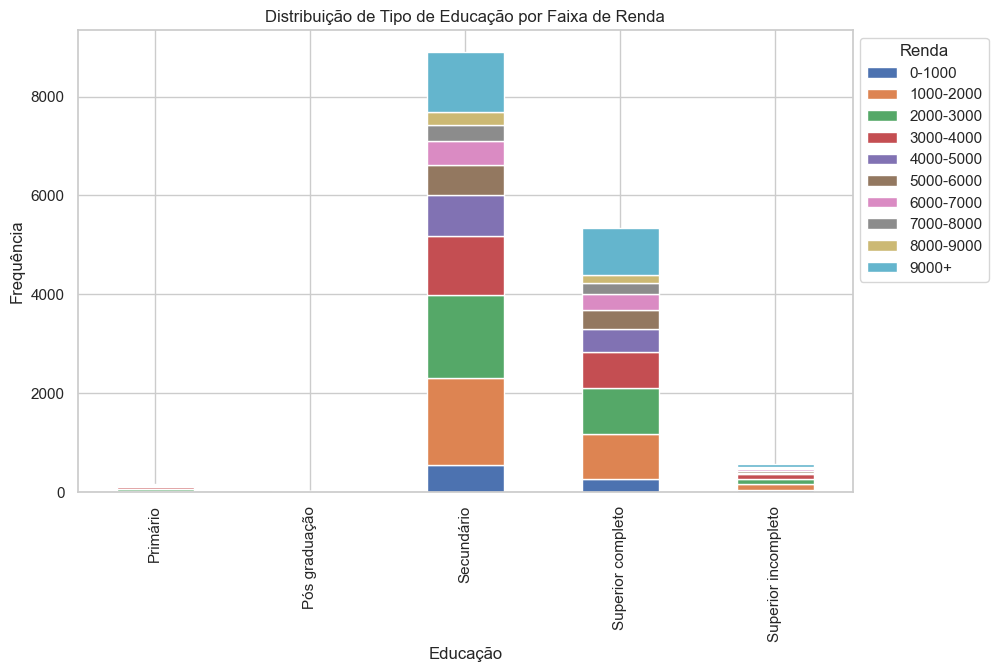

In [23]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('Educação')
ax.set_title('Distribuição de Tipo de Educação por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

#### Média e desvio padrão da educação

Não foi incluso os 'Primário' e 'Pós Graduação' devido a pobre amostragem. Fica claro a importância do desvio padrão na análise nesse caso, onde os valores de 'Secundário' e 'Superior Incompleto' apresentam médias maiores, porém tem o desvio padrão muito grande, em contrapartida o 'Superior Completo' é bem mais estável em seu resultado.

In [24]:
# Secundário
media_secundario = df_clone[df_clone['educacao'] == 'Secundário']['renda'].mean()
std_secundario = df_clone[df_clone['educacao'] == 'Secundário']['renda'].std()
print(f'Secundário - Média: {media_assalariado} / Desvio Padrão: {std_assalariado}\n')

# Superior Completo
media_superior_completo = df_clone[df_clone['educacao'] == 'Superior completo']['renda'].mean()
std_superior_completo = df_clone[df_clone['educacao'] == 'Superior completo']['renda'].std()
print(f'Superior completo - Média: {media_bolsista} / Desvio Padrão: {std_bolsista}\n')

# Superior Incompleto
media_superior_incompleto = df_clone[df_clone['educacao'] == 'Superior incompleto']['renda'].mean()
std_superior_incompleto = df_clone[df_clone['educacao'] == 'Superior incompleto']['renda'].std()
print(f'Superior incompleto - Média: {media_empresario} / Desvio Padrão: {std_empresario}\n')



Secundário - Média: 6043.20511987423 / Desvio Padrão: 9543.995167564173

Superior completo - Média: 4924.911111111111 / Desvio Padrão: 1710.9261275435335

Superior incompleto - Média: 5886.054686431014 / Desvio Padrão: 7018.083572751929



#### Estado Civil

In [25]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['estado_civil'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
estado_civil,,,,,,,,,,,
Casado,627,1862,1853,1390,938,778,625,431,332,1698,10534
Separado,56,159,190,132,56,58,65,30,19,114,879
Solteiro,90,372,370,266,155,91,93,71,44,246,1798
União,66,237,205,146,102,71,37,34,35,145,1078
Viúvo,39,177,143,124,82,46,19,27,9,45,711
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


Os dados de casado são a grande maioria e tem um aumento de casados muito singelo em relação rendas, os demais dados estão muito lineares e não mudam em relação a renda, então em geral nenhuma dessas variáveis explica bem a renda.

#### Valores Proporcionais

In [26]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['estado_civil'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
estado_civil,,,,,,,,,,,
Casado,71.41%,66.33%,67.11%,67.54%,70.37%,74.52%,74.49%,72.68%,75.63%,75.53%,70.23%
Separado,6.38%,5.66%,6.88%,6.41%,4.20%,5.56%,7.75%,5.06%,4.33%,5.07%,5.86%
Solteiro,10.25%,13.25%,13.40%,12.93%,11.63%,8.72%,11.08%,11.97%,10.02%,10.94%,11.99%
União,7.52%,8.44%,7.42%,7.09%,7.65%,6.80%,4.41%,5.73%,7.97%,6.45%,7.19%
Viúvo,4.44%,6.31%,5.18%,6.03%,6.15%,4.41%,2.26%,4.55%,2.05%,2.00%,4.74%


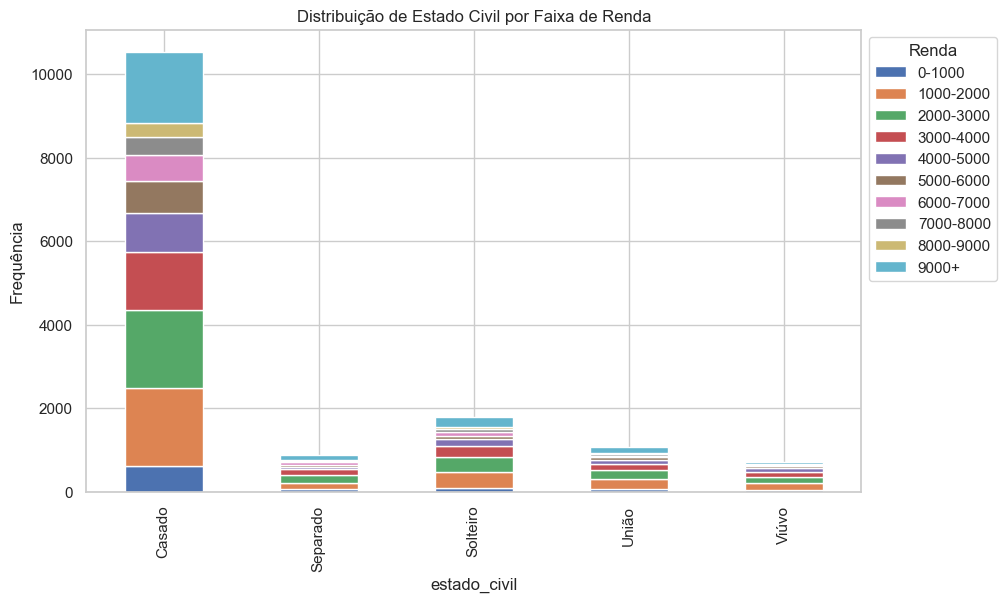

In [27]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('estado_civil')
ax.set_title('Distribuição de Estado Civil por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

#### Média e desvio padrão do estado civil

Todos os valores observados são muito instaveis, com excessão da categoria 'Separado' que são quase 6% da base total e apresentam um valor de desvio padrão muito estável.

In [28]:
# Casado
media_casado = df_clone[df_clone['estado_civil'] == 'Casado']['renda'].mean()
std_casado = df_clone[df_clone['estado_civil'] == 'Casado']['renda'].std()
print(f'Casado - Média: {media_assalariado} / Desvio Padrão: {std_assalariado}\n')

# Separado
media_separado = df_clone[df_clone['estado_civil'] == 'Separado']['renda'].mean()
std_separado = df_clone[df_clone['estado_civil'] == 'Separado']['renda'].std()
print(f'Separado - Média: {media_bolsista} / Desvio Padrão: {std_bolsista}\n')

# Solteiro
media_solteiro = df_clone[df_clone['estado_civil'] == 'Solteiro']['renda'].mean()
std_solteiro = df_clone[df_clone['estado_civil'] == 'Solteiro']['renda'].std()
print(f'Solteiro - Média: {media_empresario} / Desvio Padrão: {std_empresario}\n')

# União Estavel
media_uniao = df_clone[df_clone['estado_civil'] == 'União']['renda'].mean()
std_uniao = df_clone[df_clone['estado_civil'] == 'União']['renda'].std()
print(f'União Estavel - Média: {media_empresario} / Desvio Padrão: {std_empresario}\n')

# Viúvo
media_viuvo = df_clone[df_clone['estado_civil'] == 'Viúvo']['renda'].mean()
std_viuvo = df_clone[df_clone['estado_civil'] == 'Viúvo']['renda'].std()
print(f'Viúvo - Média: {media_empresario} / Desvio Padrão: {std_empresario}\n')

Casado - Média: 6043.20511987423 / Desvio Padrão: 9543.995167564173

Separado - Média: 4924.911111111111 / Desvio Padrão: 1710.9261275435335

Solteiro - Média: 5886.054686431014 / Desvio Padrão: 7018.083572751929

União Estavel - Média: 5886.054686431014 / Desvio Padrão: 7018.083572751929

Viúvo - Média: 5886.054686431014 / Desvio Padrão: 7018.083572751929



#### Tipo de Residência

In [29]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['tipo_residencia'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
tipo_residencia,,,,,,,,,,,
Aluguel,14,39,27,19,20,15,7,5,4,44,194
Casa,791,2543,2473,1873,1198,953,728,532,400,2041,13532
Com os pais,45,112,145,101,53,33,47,31,21,87,675
Comunitário,11,5,10,13,6,3,3,3,4,6,64
Estúdio,2,11,7,9,10,2,7,5,3,27,83
Governamental,15,97,99,43,46,38,47,17,7,43,452
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


#### Valores Proporcionais

Mesmo com muitas variáveis, muitas delas não explicam em nada a renda, a grande maioria dos valores são todos do tipo casa e os que são do tipo casa não alteram sua proporção de acordo com a renda.

In [30]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['tipo_residencia'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
tipo_residencia,,,,,,,,,,,
Aluguel,1.59%,1.39%,0.98%,0.92%,1.50%,1.44%,0.83%,0.84%,0.91%,1.96%,1.29%
Casa,90.09%,90.59%,89.57%,91.01%,89.87%,91.28%,86.77%,89.71%,91.12%,90.79%,90.21%
Com os pais,5.13%,3.99%,5.25%,4.91%,3.98%,3.16%,5.60%,5.23%,4.78%,3.87%,4.50%
Comunitário,1.25%,0.18%,0.36%,0.63%,0.45%,0.29%,0.36%,0.51%,0.91%,0.27%,0.43%
Estúdio,0.23%,0.39%,0.25%,0.44%,0.75%,0.19%,0.83%,0.84%,0.68%,1.20%,0.55%
Governamental,1.71%,3.46%,3.59%,2.09%,3.45%,3.64%,5.60%,2.87%,1.59%,1.91%,3.01%


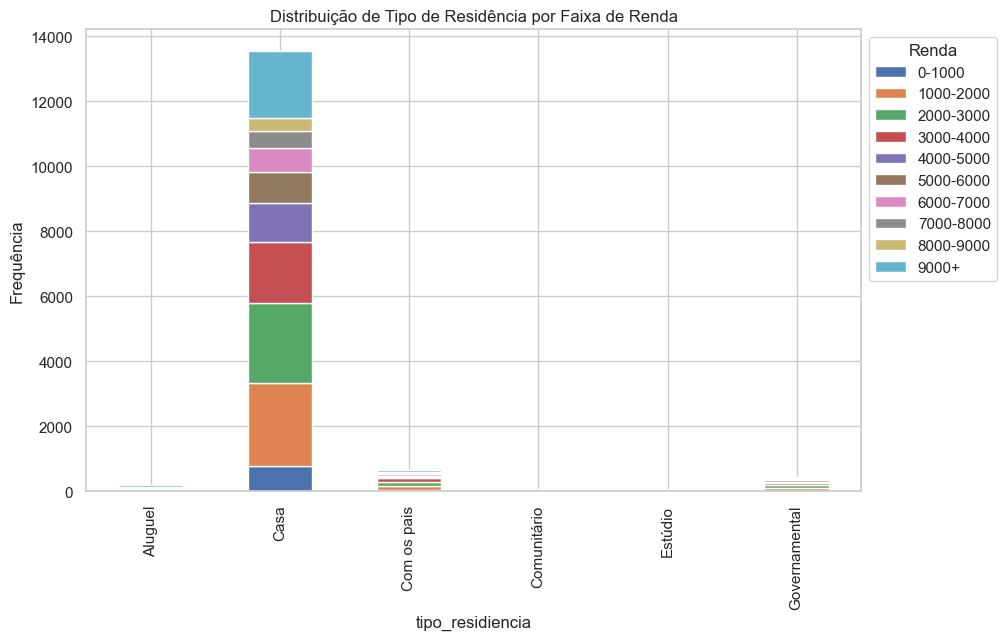

In [31]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('tipo_residiencia')
ax.set_title('Distribuição de Tipo de Residência por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

#### Média e desvio padrão tipo de residência

In [32]:
# Casa
media_casa = df_clone[df_clone['tipo_residencia'] == 'Casa']['renda'].mean()
std_casado = df_clone[df_clone['tipo_residencia'] == 'Casa']['renda'].std()
print(f'Casa - Média: {media_assalariado} / Desvio Padrão: {std_assalariado}\n')

# Separado
media_com_pais = df_clone[df_clone['tipo_residencia'] == 'Com os pais']['renda'].mean()
std_com_pais = df_clone[df_clone['tipo_residencia'] == 'Com os pais']['renda'].std()
print(f'Com os pais - Média: {media_bolsista} / Desvio Padrão: {std_bolsista}\n')

# Solteiro
media_governamental = df_clone[df_clone['tipo_residencia'] == 'Governamental']['renda'].mean()
std_governamental = df_clone[df_clone['tipo_residencia'] == 'Governamental']['renda'].std()
print(f'Governamental - Média: {media_empresario} / Desvio Padrão: {std_empresario}\n')

Casa - Média: 6043.20511987423 / Desvio Padrão: 9543.995167564173

Com os pais - Média: 4924.911111111111 / Desvio Padrão: 1710.9261275435335

Governamental - Média: 5886.054686431014 / Desvio Padrão: 7018.083572751929



#### Quantidade de Filhos

A variável 'qtd_filhos' foi colocada como categórica devido a sua natureza, que tem apenas 8 valores, sendo que o valor 14 é um outlier.

As pessoas que tem dois filhos seriam as pessoas com maior peso para explicar a renda, pois possuem um valor maior da média se comparado aos demais e tem um desvio padrão baixo.

Text(0.5, 1.0, 'Relação entre Quantidade de Filhos e Renda Média')

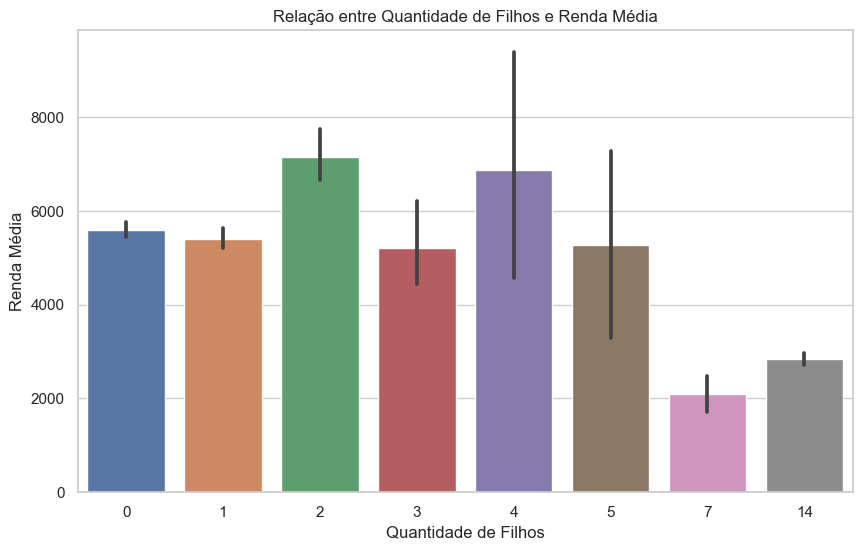

In [33]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Cria o gráfico de barras
sns.barplot(x='qtd_filhos', y='renda', data=df)

plt.xlabel('Quantidade de Filhos')
plt.ylabel('Renda Média')
plt.title('Relação entre Quantidade de Filhos e Renda Média')

In [34]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['qtd_filhos'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
qtd_filhos,,,,,,,,,,,
0,636,2008,1926,1443,928,728,561,416,285,1445,10376
1,159,538,585,413,272,211,186,112,88,473,3037
2,75,213,211,177,112,86,86,53,61,302,1376
3,6,45,33,23,19,15,5,11,5,23,185
4,2,1,1,1,2,4,1,0,0,5,17
5,0,0,0,1,0,0,0,1,0,0,2
7,0,2,3,0,0,0,0,0,0,0,5
14,0,0,2,0,0,0,0,0,0,0,2
All,878,2807,2761,2058,1333,1044,839,593,439,2248,15000


A quantidade de filhos quase que não explica a renda, aumenta um pouco a quantidade de 1 e 2 filhos nas rendas mais altas, mas a diferença é muito baixa.

In [35]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['qtd_filhos'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
qtd_filhos,,,,,,,,,,,
0,72.44%,71.54%,69.76%,70.12%,69.62%,69.73%,66.87%,70.15%,64.92%,64.28%,69.17%
1,18.11%,19.17%,21.19%,20.07%,20.41%,20.21%,22.17%,18.89%,20.05%,21.04%,20.25%
2,8.54%,7.59%,7.64%,8.60%,8.40%,8.24%,10.25%,8.94%,13.90%,13.43%,9.17%
3,0.68%,1.60%,1.20%,1.12%,1.43%,1.44%,0.60%,1.85%,1.14%,1.02%,1.23%
4,0.23%,0.04%,0.04%,0.05%,0.15%,0.38%,0.12%,0.00%,0.00%,0.22%,0.11%
5,0.00%,0.00%,0.00%,0.05%,0.00%,0.00%,0.00%,0.17%,0.00%,0.00%,0.01%
7,0.00%,0.07%,0.11%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.03%
14,0.00%,0.00%,0.07%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%


#### Quantidade de Pessoas Residência

In [36]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores pra função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['qt_pessoas_residencia'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
qt_pessoas_residencia,,,,,,,,,,,
1.0,160,573,575,430,236,161,134,110,57,316,2752
2.0,499,1556,1458,1087,745,601,466,317,241,1211,8181
3.0,144,429,495,352,222,179,151,106,75,398,2551
4.0,67,201,195,166,109,84,83,50,61,295,1311
5.0,6,45,32,21,19,15,4,9,5,23,179
6.0,2,1,1,2,2,4,1,0,0,5,18
7.0,0,0,0,0,0,0,0,1,0,0,1
9.0,0,2,3,0,0,0,0,0,0,0,5
15.0,0,0,2,0,0,0,0,0,0,0,2


In [37]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['qt_pessoas_residencia'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
qt_pessoas_residencia,,,,,,,,,,,
1.0,18.22%,20.41%,20.83%,20.89%,17.70%,15.42%,15.97%,18.55%,12.98%,14.06%,18.35%
2.0,56.83%,55.43%,52.81%,52.82%,55.89%,57.57%,55.54%,53.46%,54.90%,53.87%,54.54%
3.0,16.40%,15.28%,17.93%,17.10%,16.65%,17.15%,18.00%,17.88%,17.08%,17.70%,17.01%
4.0,7.63%,7.16%,7.06%,8.07%,8.18%,8.05%,9.89%,8.43%,13.90%,13.12%,8.74%
5.0,0.68%,1.60%,1.16%,1.02%,1.43%,1.44%,0.48%,1.52%,1.14%,1.02%,1.19%
6.0,0.23%,0.04%,0.04%,0.10%,0.15%,0.38%,0.12%,0.00%,0.00%,0.22%,0.12%
7.0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.17%,0.00%,0.00%,0.01%
9.0,0.00%,0.07%,0.11%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.03%
15.0,0.00%,0.00%,0.07%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%


Quase que todos valores de quantidade de pessoas na residência não mudam tanto, o número de um filho diminui um pouco quando a renda aumenta e o número de 4 filhos aumenta quando a renda está mais alta, mas não chega a explicar tão bem a renda.

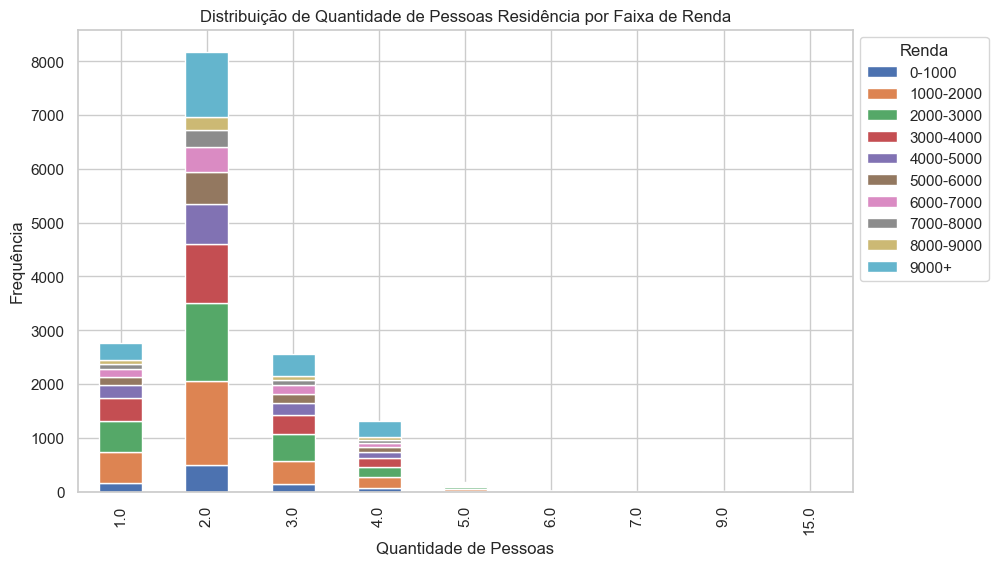

In [38]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('Quantidade de Pessoas')
ax.set_title('Distribuição de Quantidade de Pessoas Residência por Faixa de Renda')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

In [39]:
media_qt_pessoas_residencia  = df_clone.groupby('qt_pessoas_residencia')['renda'].mean()
print(f'Média de renda por pessoas na residência: \n{media_qt_pessoas_residencia}\n')

desvio_qt_pessoas_residencia = df_clone.groupby('qt_pessoas_residencia')['renda'].std()
print(f'Desvio padrão por pessoas na residência: \n{desvio_qt_pessoas_residencia}')

Média de renda por pessoas na residência: 
qt_pessoas_residencia
1.0     4852.686097
2.0     5824.138641
3.0     5424.266821
4.0     7277.613921
5.0     5226.596425
6.0     6674.985556
7.0     7269.870000
9.0     2100.720000
15.0    2847.505000
Name: renda, dtype: float64

Desvio padrão por pessoas na residência: 
qt_pessoas_residencia
1.0      5796.396026
2.0      9254.946710
3.0      5793.860441
4.0     10081.222177
5.0      6304.329261
6.0      5114.048128
7.0              NaN
9.0       519.460074
15.0      176.656487
Name: renda, dtype: float64


Ao fazer todas análises dos dados categóricos foi possível tirar algumas conclusões que poderam ser confirmadas no momento da modelagem como a relevância/irrelevância das variáveis e também  da presença de outliers quando é feito a junção da informação de desvio padrão com tamanho de amostragem única, como visto no caso do tipo de residência com a 'Casa' em 90% dos valores ou até no caso de 'Casado'.

### Variáveis Numéricas

#### Idade

In [40]:
# Verificando o valor máximo da idade para aplicar a função e saber o número de intervalos
maximo = df['idade'].max()
maximo

68

In [41]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) # Passando os valores de renda para função
intervalos_idade, rotulos_idade = gerar_intervalos_e_rotulos(5, 60) # Valores de idade para função
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior. O mesmo vale para idade_intervalo.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)
df_clone['idade_intervalo'] = pd.cut(df_clone['idade'], bins=intervalos_idade, labels=rotulos_idade, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['idade_intervalo'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
idade_intervalo,,,,,,,,,,,
20-25,15,40,27,18,10,5,9,2,5,9,140
25-30,108,317,298,222,113,112,92,54,34,183,1533
30-35,116,448,397,285,207,127,107,76,63,309,2135
35-40,126,338,377,272,205,158,112,63,70,382,2103
40-45,126,367,382,297,175,165,147,90,93,379,2221
45-50,97,312,333,248,160,139,105,85,70,302,1851
50-55,78,300,316,218,157,143,119,94,39,309,1773
55-60,98,293,302,211,139,100,83,56,37,208,1527
60+,114,392,329,287,167,95,65,73,28,167,1717


#### Valores Proporcionais

In [42]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['idade_intervalo'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
idade_intervalo,,,,,,,,,,,
20-25,1.71%,1.43%,0.98%,0.87%,0.75%,0.48%,1.07%,0.34%,1.14%,0.40%,0.93%
25-30,12.30%,11.29%,10.79%,10.79%,8.48%,10.73%,10.97%,9.11%,7.74%,8.14%,10.22%
30-35,13.21%,15.96%,14.38%,13.85%,15.53%,12.16%,12.75%,12.82%,14.35%,13.75%,14.23%
35-40,14.35%,12.04%,13.65%,13.22%,15.38%,15.13%,13.35%,10.62%,15.95%,16.99%,14.02%
40-45,14.35%,13.07%,13.84%,14.43%,13.13%,15.80%,17.52%,15.18%,21.18%,16.86%,14.81%
45-50,11.05%,11.12%,12.06%,12.05%,12.00%,13.31%,12.51%,14.33%,15.95%,13.43%,12.34%
50-55,8.88%,10.69%,11.45%,10.59%,11.78%,13.70%,14.18%,15.85%,8.88%,13.75%,11.82%
55-60,11.16%,10.44%,10.94%,10.25%,10.43%,9.58%,9.89%,9.44%,8.43%,9.25%,10.18%
60+,12.98%,13.97%,11.92%,13.95%,12.53%,9.10%,7.75%,12.31%,6.38%,7.43%,11.45%


Dessa vez ficou mais fácil de analisar pelo gráfico; As pessoas entre 30 e 45 ganham mais e depois começa a decair.

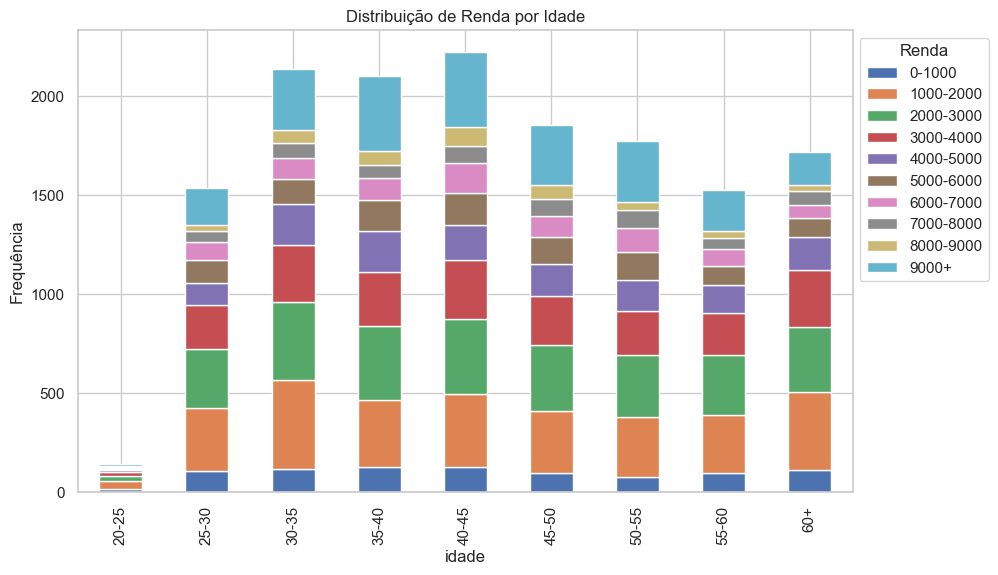

In [43]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('idade')
ax.set_title('Distribuição de Renda por Idade')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

A idade está bem corelacionada com a renda, só que não é uma relação linear, primeiro aumenta e depois volta a diminuir.

In [44]:
media_por_idade = df_clone.groupby('idade_intervalo')['renda'].mean()
print(f'Média de renda por faixa de idade: \n{media_por_idade[4:]}\n')

desvio_padrao_por_idade = df_clone.groupby('idade_intervalo')['renda'].std()
print(f'Desvio padrão de renda por faixa de idade: \n{desvio_padrao_por_idade[4:]}')

Média de renda por faixa de idade: 
idade_intervalo
20-25    3727.837000
25-30    4616.416262
30-35    5197.740867
35-40    6154.146824
40-45    6243.417353
45-50    6014.216548
50-55    6289.671094
55-60    5842.758939
60+      5095.323529
Name: renda, dtype: float64

Desvio padrão de renda por faixa de idade: 
idade_intervalo
20-25     3495.148123
25-30     4481.948062
30-35     6136.243280
35-40     8835.423426
40-45     8412.235127
45-50     7273.469571
50-55     8314.408904
55-60    10538.469603
60+      10680.314462
Name: renda, dtype: float64


#### Tempo Emprego

In [45]:
# Verificando o valor máximo da tempo de emprego para aplicar a função e saber o número de intervalos
maximo = df['tempo_emprego'].max()
maximo

42.90684931506849

In [46]:
df_clone = df.copy() # Gerando um DF novo pra poder mexer sem alterar o original
# Passando os valores de renda para função
intervalos, rotulos = gerar_intervalos_e_rotulos(1000, 9000) 
# Valores de tempo de emprego para função
intervalos_t_emprego, rotulos_t_emprego = gerar_intervalos_e_rotulos(5, maximo) 
'''Criando a coluna renda_intervalo com intervalos dos valores de renda, esses intervalos
vão ser divididos conforme o valor de intervalos e cada pedaço criado vai ser preenchido
pelo valor de rotulos, o right serve para excluir o limite superior, então a margem vai incluir
o limite inferior. O mesmo vale para t_emprego_intervalo.'''
df_clone['renda_intervalo'] = pd.cut(df_clone['renda'], bins=intervalos, labels=rotulos, right=False)
df_clone['t_emprego_intervalo'] = pd.cut(df_clone['tempo_emprego'], bins=intervalos_t_emprego, labels=rotulos_t_emprego, right=False)

# Crie uma tabela de informações cruzadas usando pd.crosstab(), margins=True inclui os totais
info_cross = pd.crosstab(
    index=df_clone['t_emprego_intervalo'],
    columns=df_clone['renda_intervalo'], 
    margins=True)
info_cross

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
t_emprego_intervalo,,,,,,,,,,,
0-5,438,1282,1124,778,485,355,255,158,109,353,5337
5-10,201,626,711,531,316,291,269,197,136,631,3909
10-15,33,184,234,176,139,114,80,75,78,455,1568
15-20,7,47,97,85,86,77,50,27,35,294,805
20-25,1,16,32,46,39,48,34,19,25,167,427
25-30,0,5,14,19,13,10,32,14,7,109,223
30-35,0,4,3,2,2,8,11,11,1,55,97
35-40,0,0,1,0,1,0,0,2,0,28,32
40-45,0,0,0,0,3,0,2,3,0,21,29


O tempo de emprego bem similar a idade também tem um começo menor e depois aumenta o valor da renda.

In [47]:
info_cross_proporcional = pd.crosstab(
    index=df_clone['t_emprego_intervalo'],
    columns=df_clone['renda_intervalo'], 
    margins=True,
    normalize='columns')# Divide os valores pelo total
info_cross_proporcional = info_cross_proporcional.applymap(lambda x: f'{x*100:.2f}%') # Vezes 100, deixa 2 casas decimais e %
info_cross_proporcional

renda_intervalo,0-1000,1000-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000+,All
t_emprego_intervalo,,,,,,,,,,,
0-5,64.41%,59.24%,50.72%,47.53%,44.74%,39.31%,34.79%,31.23%,27.88%,16.71%,42.95%
5-10,29.56%,28.93%,32.08%,32.44%,29.15%,32.23%,36.70%,38.93%,34.78%,29.86%,31.46%
10-15,4.85%,8.50%,10.56%,10.75%,12.82%,12.62%,10.91%,14.82%,19.95%,21.53%,12.62%
15-20,1.03%,2.17%,4.38%,5.19%,7.93%,8.53%,6.82%,5.34%,8.95%,13.91%,6.48%
20-25,0.15%,0.74%,1.44%,2.81%,3.60%,5.32%,4.64%,3.75%,6.39%,7.90%,3.44%
25-30,0.00%,0.23%,0.63%,1.16%,1.20%,1.11%,4.37%,2.77%,1.79%,5.16%,1.79%
30-35,0.00%,0.18%,0.14%,0.12%,0.18%,0.89%,1.50%,2.17%,0.26%,2.60%,0.78%
35-40,0.00%,0.00%,0.05%,0.00%,0.09%,0.00%,0.00%,0.40%,0.00%,1.33%,0.26%
40-45,0.00%,0.00%,0.00%,0.00%,0.28%,0.00%,0.27%,0.59%,0.00%,0.99%,0.23%


Juntando as informações das duas tabelas da para entender bem o gráfico, a primeira tabela explica bem a quantidade de individuos por faixa de idade e a segunda a proporção de individuos por faixa de renda, a faixa de 9000+ fica bem diferente da coluna 0-5 para 5-10, mas sempre é possível comparar usando a tabela de proporções também, todos resultados de 6000 para cima são maiores na faixa de 5-10. Essa variável é relevante para a análise do modelo.

**Na análise a porcentagem apresentada são valores onde cada coluna representa o total daquela faixa de renda, então caso queira saber a proporção em relação ao total de cada faixa teria que dividir pelo total dessa faixa em especifico.** 

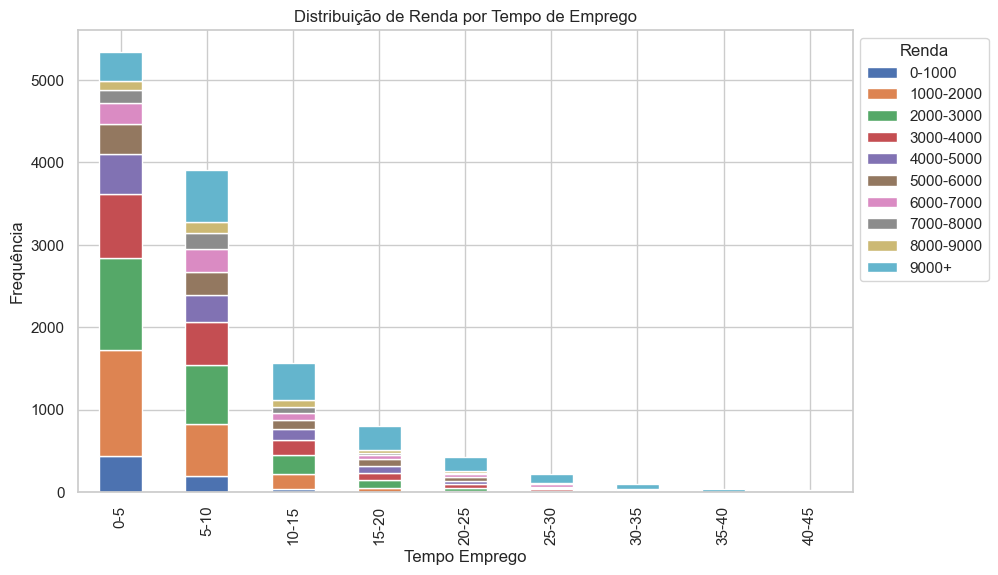

In [48]:
sns.set(style="whitegrid") # Coloca uma grade no fundo da imagem
'''Usa a tabela anterior para criar o gráfico do tipo barra empilhado com as infos de True e False, 
os valores de iloc são para pegar toda tabela menos a ultima linha e coluna(as margens)'''
ax = info_cross.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicione rótulos e título
ax.set_ylabel('Frequência')
ax.set_xlabel('Tempo Emprego')
ax.set_title('Distribuição de Renda por Tempo de Emprego')

# Exibe a legenda fora do gráfico, uso do loc para superior esquerdo
ax.legend(title='Renda', bbox_to_anchor=(1, 1), loc='upper left')

Ao olhar a média fica mais fácil de enxergar o aumento da renda por faixa de tempo de emprego, o desvio padrão infelizmente é muito alto, principalmente quando chega na faixa de 10-15.

In [49]:
media_tempo_emprego = df_clone.groupby('t_emprego_intervalo')['renda'].mean()
print(f'Média de renda por faixa de tempo de emprego: \n{media_tempo_emprego[:-1]}\n')

desvio_padrao_tempo_emprego = df_clone.groupby('t_emprego_intervalo')['renda'].std()
print(f'Desvio padrão de renda por faixa de tempo de emprego: \n{desvio_padrao_tempo_emprego[:-1]}')

Média de renda por faixa de tempo de emprego: 
t_emprego_intervalo
0-5       3799.012293
5-10      5549.813533
10-15     8232.496620
15-20    10422.111652
20-25    12691.504637
25-30    13559.263004
30-35    26627.844330
35-40    26504.010312
40-45    29941.999310
Name: renda, dtype: float64

Desvio padrão de renda por faixa de tempo de emprego: 
t_emprego_intervalo
0-5       3363.567391
5-10      5425.229322
10-15     9853.575122
15-20    11868.730043
20-25    17355.743503
25-30    16463.281638
30-35    38240.313581
35-40    19609.607519
40-45    41069.892208
Name: renda, dtype: float64


#### Correlação dos Dados Numéricos Continuos

Foi aplicado a correlação entre as variáveis idade, tempo_emprego e renda, onde 1 representa uma correlação positiva, ou seja, quando uma variável aumenta a outra também aumenta e -1 uma correlação onde quando uma variável aumenta a outra diminui. 

Idade + tempo_emprego = 32,15% <br>
idade + renda = 2,24% <br>
tempo_emprego + renda = 38,50%

O tempo de emprego tem uma boa correlação com idade e com a renda, porém a idade tem uma correlação muito baixa com a renda.

In [50]:
df_corr_num = df[['idade', 'tempo_emprego', 'renda']]
correlation_matrix = df_corr_num.corr()
correlation_matrix

,idade,tempo_emprego,renda
idade,1.000000,0.321573,0.022435
tempo_emprego,0.321573,1.000000,0.385013
renda,0.022435,0.385013,1.000000


<Axes: >

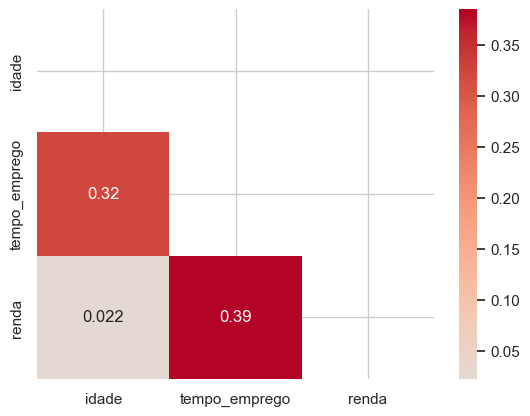

In [51]:
'''Feito um filtro da matriz para remover os valores repetidos tri=triangulo e u=upper(acima), 
triu remove a parte triangular de cima'''
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)

# Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes => tempo_emprego = 0
 remover bolsista da analise
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?

#### Nessa etapa será feito as alterações com base na análise feita da etapa anterior, será alterado o DataFrame de forma com que ele fique aplicável na próxima etapa que é a modelagem. Para isso as variáveis categóricas serão transformadas em dummies, ou seja,vão ser transformadas em variáveis booleanas zero ou um, pois os algoritimos de aprendizado de máquina trabalham melhor com números, esse processo é conhecido como one-hot encoding. Também vão ser feitos as demais alterações como o tratamento dos valores faltantes de tempo_emprego. As variáveis que contem valores irrelavantes também serão vistos com uma análise de relevancia levando em consideração o P value, o p-value ajuda a determinar se os resultados observados são estatisticamente significativos ou se podem ter ocorrido apenas devido ao acaso.

### Aplicando One-Hot Encoding

In [52]:
df_model = df.copy() # Copiando o DF original para modelar
df_model.dtypes # Verificando o tipo das colunas para dividir as que vão precisar virar dummies


posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

As variáveis **qt_pessoas_residencia** e **qtd_filhos** estão atuando como se fossem variáveis categóricas apesarem de ter valores int e float, então elas serão transformadas para passarem pelo filtro de dummies.


In [53]:
''' A coluna de quantidade de pessoas por residencia vai ser transformado em int primeiro, pois
no momento de usa-la para passar no statsmodels e criar uma regressão, o final de seu nome faz com que
dê um erro ao ser usado na formula por ter o ponto e número, exemplo qt_pessoas_residencia_2.0, a parte
do .0 faz com que tenha erro na leitura'''
df_model['qt_pessoas_residencia'] = df_model['qt_pessoas_residencia'].astype(int)

colunas_transformar = ['qtd_filhos', 'qt_pessoas_residencia']
df_model[colunas_transformar] = df_model[colunas_transformar].astype(str)
df_model.dtypes # Verificando o tipo das colunas para dividir as que vão precisar virar dummies

posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                object
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia     object
renda                    float64
dtype: object

As colunas bool também vão ser transformadas em zero ou um por questões de desempenho.

In [54]:
df_model['posse_de_veiculo'] = df_model['posse_de_veiculo'].astype(int)
df_model['posse_de_imovel'] = df_model['posse_de_imovel'].astype(int)
df_model.dtypes # Verificando o tipo das colunas para dividir as que vão precisar virar dummies

posse_de_veiculo           int32
posse_de_imovel            int32
qtd_filhos                object
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia     object
renda                    float64
dtype: object

In [55]:
''' Estou separando o df_model em colunas_dummy, que vão ser transformadas e colunas_num, 
que são as numéricas e não precisam de alteração'''
colunas_dummy = df_model.select_dtypes(include=['object']).columns
colunas_num = df_model.select_dtypes(include=['int', 'float']).columns

print(colunas_dummy)
print('\n')
print(colunas_num)


Index(['qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'qt_pessoas_residencia'],
      dtype='object')


Index(['posse_de_veiculo', 'posse_de_imovel', 'idade', 'tempo_emprego',
       'renda'],
      dtype='object')


In [56]:
# Aplicando o get_dummies apenas nas colunas object
colunas_dummy = pd.get_dummies(df_model[colunas_dummy], dtype=int)
colunas_dummy

,qtd_filhos_0,qtd_filhos_1,qtd_filhos_14,qtd_filhos_2,qtd_filhos_3,qtd_filhos_4,qtd_filhos_5,qtd_filhos_7,tipo_renda_Assalariado,tipo_renda_Bolsista,...,tipo_residencia_Governamental,qt_pessoas_residencia_1,qt_pessoas_residencia_15,qt_pessoas_residencia_2,qt_pessoas_residencia_3,qt_pessoas_residencia_4,qt_pessoas_residencia_5,qt_pessoas_residencia_6,qt_pessoas_residencia_7,qt_pessoas_residencia_9
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14996,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Agora será unido tudo em um DataFrame com o concat. Para cada valor das variáveis categóricas foi criado uma nova coluna, se for verdadeiro a coluna terá o valor 1, do contrário terá o valor 0. As demais colunas como tempo_emprego, renda e idade se mantem.

In [57]:
'''Feito a união dos valores de colunas_num e colunas dummy, os valores de colunas dummy
não precisaram ser passados como DataFrame porque no processo de get_dummies a variável 
colunas_dummy foi transformada em um DataFrame'''
df_model = pd.concat([df_model[colunas_num], colunas_dummy], axis=1)

print(df_model.columns)
df_model.head(3)

Index(['posse_de_veiculo', 'posse_de_imovel', 'idade', 'tempo_emprego',
       'renda', 'qtd_filhos_0', 'qtd_filhos_1', 'qtd_filhos_14',
       'qtd_filhos_2', 'qtd_filhos_3', 'qtd_filhos_4', 'qtd_filhos_5',
       'qtd_filhos_7', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Primário',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro',
       'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental', 'qt_pessoas_residencia_1',
       'qt_pessoas_residencia_15', 'qt_pessoas_residencia_2',
       'qt_pessoas_residencia_3', 'qt_pessoas_residencia_4',
   

,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,renda,qtd_filhos_0,qtd_filhos_1,qtd_filhos_14,qtd_filhos_2,qtd_filhos_3,...,tipo_residencia_Governamental,qt_pessoas_residencia_1,qt_pessoas_residencia_15,qt_pessoas_residencia_2,qt_pessoas_residencia_3,qt_pessoas_residencia_4,qt_pessoas_residencia_5,qt_pessoas_residencia_6,qt_pessoas_residencia_7,qt_pessoas_residencia_9
0,0,1,26,6.602740,8060.34,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,28,7.183562,1852.15,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,35,0.838356,2253.89,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


No processo de transformação em dummy, algumas colunas como 'tipo_residencia_Com os pais' ou 'educacao_Superior completo' ficaram com espaço no nome, o que pode causar erros no momento da modelagem, então esses espaços vão ser substituidos por underline "_".

In [58]:
df_model.columns = df_model.columns.str.replace(' ', '_')
df_model.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'idade', 'tempo_emprego',
       'renda', 'qtd_filhos_0', 'qtd_filhos_1', 'qtd_filhos_14',
       'qtd_filhos_2', 'qtd_filhos_3', 'qtd_filhos_4', 'qtd_filhos_5',
       'qtd_filhos_7', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor_público', 'educacao_Primário',
       'educacao_Pós_graduação', 'educacao_Secundário',
       'educacao_Superior_completo', 'educacao_Superior_incompleto',
       'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro',
       'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel',
       'tipo_residencia_Casa', 'tipo_residencia_Com_os_pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental', 'qt_pessoas_residencia_1',
       'qt_pessoas_residencia_15', 'qt_pessoas_residencia_2',
       'qt_pessoas_residencia_3', 'qt_pessoas_residencia_4',
   

### Preenchendo Valores Faltantes

Como foi visto na etapa anterior, as pessoas que são pensionistas não tem tempo de emprego porém possui renda, isso é totalmente condizente com a realidade, pessoas que são pensionistas realmente não tem tempo de emprego e ainda assim tem sua renda, por isso para ficar de acordo com a realidade os valores faltantes de tempo_emprego vão ser preenchidos com zero, mesmo que isso posso prejudicar sua correlação  com renda.

In [59]:
# Mostrando novamente as colunas com valores faltantes
missing_values = df_model.isna().sum()
print(missing_values)

posse_de_veiculo                    0
posse_de_imovel                     0
idade                               0
tempo_emprego                    2573
renda                               0
qtd_filhos_0                        0
qtd_filhos_1                        0
qtd_filhos_14                       0
qtd_filhos_2                        0
qtd_filhos_3                        0
qtd_filhos_4                        0
qtd_filhos_5                        0
qtd_filhos_7                        0
tipo_renda_Assalariado              0
tipo_renda_Bolsista                 0
tipo_renda_Empresário               0
tipo_renda_Pensionista              0
tipo_renda_Servidor_público         0
educacao_Primário                   0
educacao_Pós_graduação              0
educacao_Secundário                 0
educacao_Superior_completo          0
educacao_Superior_incompleto        0
estado_civil_Casado                 0
estado_civil_Separado               0
estado_civil_Solteiro               0
estado_civil

In [60]:
df_model = df_model.fillna(0) # Preenchendo com zero todos valores faltantes
missing_values = df_model.isna().sum() # Mostrando que não tem valores faltantes
print(missing_values)

posse_de_veiculo                 0
posse_de_imovel                  0
idade                            0
tempo_emprego                    0
renda                            0
qtd_filhos_0                     0
qtd_filhos_1                     0
qtd_filhos_14                    0
qtd_filhos_2                     0
qtd_filhos_3                     0
qtd_filhos_4                     0
qtd_filhos_5                     0
qtd_filhos_7                     0
tipo_renda_Assalariado           0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor_público      0
educacao_Primário                0
educacao_Pós_graduação           0
educacao_Secundário              0
educacao_Superior_completo       0
educacao_Superior_incompleto     0
estado_civil_Casado              0
estado_civil_Separado            0
estado_civil_Solteiro            0
estado_civil_União               0
estado_civil_Viúvo               0
tipo_residencia_Alug

# Etapa 4 Crisp - DM: Modelagem

### Avaliação de Variáveis Relevantes

#### Como visto nas etapas anteriores, algumas variáveis não vão ser relevantes seja por falta de amostragem de algum valor especifico ou por correlação, mas para a análise ficar mais robusta serão utilizados algumas técnicas para fazer essa separação de forma estatistica.

#### Foi criado uma regressão sem qualquer alteração para ter uma noção de como está a relevancia das variáveis. Nessa análise será considerado um valor de P para 5% e os valores de R² para responder o quão bem as variáveis explicativas estão para a variável resposta **renda**.

In [61]:
# Declarando X para guardar as colunas explicativas e y para variável resposta.
X = df_model.drop(columns=['renda'])
y = df_model['renda']

# Criando o modelo de regressão
model = sm.OLS(y, X)

# Ajustando o modelo aos dados
results = model.fit()

# Obtendo o resumo dos resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     94.69
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:44:07   Log-Likelihood:            -1.5516e+05
No. Observations:               15000   AIC:                         3.104e+05
Df Residuals:                   14966   BIC:                         3.106e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
posse_de_veicu

Aqui foi separado os conjuntos de valores guardados anteriormente pelo X e y para treino e teste. Essa abordagem é necessária para poder trabalhar com dados ainda não vistos (que no caso vão ser os dados de teste) e evitar que o modelo funcione apenas quando está em treinamento. Os modelos tendem a se ajustar muito bem aos dados de treinamento e ir pior nos dados de teste e pra isso vão ser feito algumas alterações para evitar o Underfit, que é quando o modelo não se ajusta direito aos dados ou para o Overfit, que é quando se adequa muito bem aos dados de treino porém vai não faz uma boa predição nos dados de teste.

In [62]:
# Realizar a divisão em 75% para treinamento e 25% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Validação Cruzada com Ridge e Lasso

#### Os modelos de regressão Lasso e Ridge, são técnicas de regularização usadas para lidar com problemas de multicolinearidade e overfitting em modelos de regressão linear. Ambos os métodos usam o valor de alpha para penalizar os coeficientes de cada variável explicativa, o Ridge pode deixar esses valores próximos a zero, o que pode ajudar a evitar o Overfitting já que os coeficientes são mantidos menores, mas pode causar o Underfitting; Já o Lasso pode chegar a zerar alguns coeficientes, o que pode ser útil nesse caso, já que muitas das variáveis foram vistas como irrelevantes.

In [63]:
''' Os valores de alpha que serão utilizados vão de 10 elevado a -6 e 6, nesse intervalo 500 números serão
 selecionados espaçados igualmente entre eles'''
alphas = np.logspace(-6, 6, 300)

### Ridge

In [64]:
ridge = Ridge() # Criando o Ridge
param_grid = {'alpha': alphas} # Guardando os valores de alpha

''' O valor de cv são chamados de folds, cada valor de alpha determinado no conjunto de dados do alphas
vai passar pelo cross-validation, no caso os dados vão ser divididos em 5 partes, 1 pra teste e 4 para 
treino, as partes vão se modificando até que cada parte tenha sido o teste uma vez, então serão feitas
5*300 testes.
'''
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha'] # Atribuindo o melhor alpha ao best_alpha_ridge
best_score_ridge = grid_search_ridge.best_score_ # O score é o valor do R² que vem como padrão

# Obtenha o modelo com o melhor valor de alpha (o melhor grid_search)
best_model_ridge = grid_search_ridge.best_estimator_

# Acesse os coeficientes das variáveis
coeficientes_ridge = best_model_ridge.coef_

''' Está sendo percorrido as colunas de X_train e mostrando a variável(coluna) e o
coeficientes do melhor alpha usado pelo ridge'''
for col, coef in zip(X_train.columns, coeficientes_ridge):
    print(f"Variável: {col}, Coeficiente: {coef}")

print(f"Melhor alpha: {best_alpha_ridge}")
print(f"Melhor score de validação cruzada: {best_score_ridge}")

Variável: posse_de_veiculo, Coeficiente: 1634.736438190438
Variável: posse_de_imovel, Coeficiente: 135.96377283861176
Variável: idade, Coeficiente: 30.162356016233442
Variável: tempo_emprego, Coeficiente: 532.0169841000808
Variável: qtd_filhos_0, Coeficiente: 118.55870488541986
Variável: qtd_filhos_1, Coeficiente: -192.38499032426114
Variável: qtd_filhos_14, Coeficiente: -28.711673642713137
Variável: qtd_filhos_2, Coeficiente: 226.4164165613585
Variável: qtd_filhos_3, Coeficiente: -49.14301125414021
Variável: qtd_filhos_4, Coeficiente: -55.479791766200826
Variável: qtd_filhos_5, Coeficiente: 14.205600412465847
Variável: qtd_filhos_7, Coeficiente: -33.46125487240271
Variável: tipo_renda_Assalariado, Coeficiente: -305.1786229788543
Variável: tipo_renda_Bolsista, Coeficiente: -139.9187377616147
Variável: tipo_renda_Empresário, Coeficiente: 21.421644668801402
Variável: tipo_renda_Pensionista, Coeficiente: 1128.5393126373385
Variável: tipo_renda_Servidor_público, Coeficiente: -704.863596566

In [65]:
# Fazendo predições usando o modelo treinado com o melhor alpha
y_pred_ridge = best_model_ridge.predict(X_test)

# Calculando o R² nos dados de teste
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² nos dados de teste: {r2_ridge}")

# Calculando o erro médio quadrático nos dados de teste
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Erro médio quadrático nos dados de teste: {mse_ridge}")

R² nos dados de teste: 0.1620926724258357
Erro médio quadrático nos dados de teste: 43733721.91157239


# Atenção, dependendo da máquina a ser utilizada, a quantidade de folds (cv=5) ou de logspace (300) deve ser diminuida para processar o Lasso.

### Lasso

In [66]:
lasso = Lasso() # Criando o Lasso
param_grid = {'alpha': alphas} # Guardando os valores de alpha

''' Mesmo que foi feito acima, feito teste 5 vezes para cada valor de alpha'''
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_search_lasso.fit(X_train, y_train)

best_alpha_lasso = grid_search_lasso.best_params_['alpha'] # Atribuindo o melhor alpha ao best_alpha_lasso
best_score_lasso = grid_search_lasso.best_score_ # O score é o valor do R² que vem como padrão

# Obtenha o modelo com o melhor valor de alpha (o melhor grid_search)
best_model_lasso = grid_search_lasso.best_estimator_

# Acesse os coeficientes das variáveis
coeficientes_lasso = best_model_lasso.coef_

''' Está sendo percorrido as colunas de X_train e mostrando a variável(coluna) e o
coeficientes do melhor alpha usado pelo lasso, o zip serve para iterar simultaneamente 
entre col e coef''' 
for col, coef in zip(X_train.columns, coeficientes_lasso):
    print(f"Variável: {col}, Coeficiente: {coef}")

print(f"Melhor alpha: {best_alpha_lasso}")
print(f"Melhor score de validação cruzada: {best_score_lasso}")

C:\Users\Bill_\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+11, tolerance: 6.554e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Bill_\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+11, tolerance: 6.421e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Bill_\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.947e+11, toleranc

Variável: posse_de_veiculo, Coeficiente: 1694.615591250766
Variável: posse_de_imovel, Coeficiente: 91.08929480069453
Variável: idade, Coeficiente: 28.90949001404529
Variável: tempo_emprego, Coeficiente: 533.311830873038
Variável: qtd_filhos_0, Coeficiente: 0.0
Variável: qtd_filhos_1, Coeficiente: -85.33880911983614
Variável: qtd_filhos_14, Coeficiente: -0.0
Variável: qtd_filhos_2, Coeficiente: 1.46837074335101
Variável: qtd_filhos_3, Coeficiente: -0.0
Variável: qtd_filhos_4, Coeficiente: -0.0
Variável: qtd_filhos_5, Coeficiente: 0.0
Variável: qtd_filhos_7, Coeficiente: -0.0
Variável: tipo_renda_Assalariado, Coeficiente: -0.0
Variável: tipo_renda_Bolsista, Coeficiente: -0.0
Variável: tipo_renda_Empresário, Coeficiente: 273.76936548486185
Variável: tipo_renda_Pensionista, Coeficiente: 1504.4061068699923
Variável: tipo_renda_Servidor_público, Coeficiente: -387.327201569542
Variável: educacao_Primário, Coeficiente: 0.0
Variável: educacao_Pós_graduação, Coeficiente: -0.0
Variável: educacao_

In [67]:
# Fazendo predições usando o modelo treinado com o melhor alpha
y_pred_lasso = best_model_lasso.predict(X_test)

# Calculando o R² nos dados de teste
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² nos dados de teste: {r2_lasso}")

# Calculando o erro médio quadrático nos dados de teste
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Erro médio quadrático nos dados de teste: {mse_lasso}")

R² nos dados de teste: 0.16141721683444776
Erro médio quadrático nos dados de teste: 43768976.63011375


Ambos os valores ficaram muito semelhantes, para entender melhor quais são as variáveis que estão sendo mais relevantes e ter uma nova perspectiva, será feito um stepwise.

### Stepwise

Nesse método vai ser escolhido apenas as colunas que tem o valor P menor ou igual a 5%, as colunas vão ser adicionadas da mais relevante para a menos relevante e a cada coluna adicionada será calculado um novo valor P pois os valores anteriores podem alterar de acordo com a entrada de novas colunas.

Obtendo a ordem das colunas do mais relevante para o menos relevante, vai ser útil para começar o stepwise.

In [68]:
''' Esses valores vão ser utilizados para fazer as comparações e definir se a variável
deve ser mantida ou removida, como são valores muito pequenos, ficam elevados a negativo.'''
# Criando um Panda Series para guardar os valores de P e suas colunas
p_values = results.pvalues
p_values

posse_de_veiculo                 2.935497e-41
posse_de_imovel                  1.006251e-01
idade                            2.274463e-02
tempo_emprego                    0.000000e+00
qtd_filhos_0                     4.106287e-01
qtd_filhos_1                     5.766887e-01
qtd_filhos_14                    6.337076e-01
qtd_filhos_2                     9.369289e-01
qtd_filhos_3                     5.279814e-01
qtd_filhos_4                     9.708012e-01
qtd_filhos_5                     7.975507e-01
qtd_filhos_7                     7.950751e-01
tipo_renda_Assalariado           8.952175e-01
tipo_renda_Bolsista              2.631758e-01
tipo_renda_Empresário            2.530088e-01
tipo_renda_Pensionista           2.787592e-04
tipo_renda_Servidor_público      7.063213e-01
educacao_Primário                8.369300e-01
educacao_Pós_graduação           7.901355e-01
educacao_Secundário              8.423616e-01
educacao_Superior_completo       2.854585e-01
educacao_Superior_incompleto     5

In [69]:
'''Criando um novo Panda Series que salva todas colunas de forma ordenada do menor P para o maior,
quanto menor o P, mais relevante a variável'''
# Ordena os valores de P de forma crescente e salva seu indice
p_values_crescente = p_values.sort_values().index 
for var in p_values_crescente: # Feito o for para facilitar a visualização da ordem
    print(var)

tempo_emprego
posse_de_veiculo
tipo_renda_Pensionista
idade
tipo_residencia_Estúdio
posse_de_imovel
tipo_residencia_Casa
tipo_residencia_Aluguel
tipo_residencia_Comunitário
tipo_renda_Empresário
tipo_renda_Bolsista
educacao_Superior_completo
qt_pessoas_residencia_4
tipo_residencia_Com_os_pais
qtd_filhos_0
qt_pessoas_residencia_2
qt_pessoas_residencia_1
educacao_Superior_incompleto
estado_civil_União
estado_civil_Viúvo
qtd_filhos_3
qt_pessoas_residencia_5
qtd_filhos_1
estado_civil_Separado
tipo_residencia_Governamental
qtd_filhos_14
qt_pessoas_residencia_15
estado_civil_Solteiro
estado_civil_Casado
tipo_renda_Servidor_público
qt_pessoas_residencia_3
educacao_Pós_graduação
qt_pessoas_residencia_9
qtd_filhos_7
qtd_filhos_5
educacao_Primário
educacao_Secundário
qt_pessoas_residencia_6
tipo_renda_Assalariado
qt_pessoas_residencia_7
qtd_filhos_2
qtd_filhos_4


No looping abaixo foi criado um DataFrame X_wise que vai guardar as colunas com valor igual ou menor ao valor P de 5%. Primeiro é adicionado a coluna ao X_wise, então é medido seu valor P e alocado em p_values_wise, se esse valor P for maior que 0.05 então seu indice(nome da coluna) é adicionado ao p_values_filtrado e por ultimo é verificado se algum dos valores que existem no filtro corresponde aos valores de X_wise, se verdadeiro, então essa coluna é excluida, isso é feito até que todas colunas sejam percorridas e é extraido um novo valor de P a cada iteração.

In [70]:
# Criando DF para usar no looping
X_wise = pd.DataFrame()
for var in p_values_crescente:
    X_wise[var] = X[var] # Cria a coluna de acordo com os indices de p_values_crescente
    modelo_wise = sm.OLS(y, X_wise).fit() # Faz regressão com a coluna adicionada
    p_values_wise = modelo_wise.pvalues # Obtendo os novos P value, com indice(coluna) e valor
    p_values_filtrado = p_values_wise[p_values_wise> 0.05] # Obtem os P Value maior que 5% e seus indices(colunas)
    for col in p_values_filtrado.index: #Looping para percorrer os indices de p_values_filtrado
        if col in X_wise.columns: #Se o indice de p_values_filtrado estiver nas colunas de df_wise
            X_wise.drop(col, axis=1, inplace=True) #Deleta aquela coluna que está entre os P value > 0.05
X_wise

,tempo_emprego,posse_de_veiculo,tipo_renda_Pensionista,idade,tipo_residencia_Estúdio,tipo_residencia_Aluguel,tipo_renda_Empresário,estado_civil_Casado
0,6.602740,0,0,26,0,0,1,0
1,7.183562,1,0,28,0,0,0,1
2,0.838356,1,0,35,0,0,1,1
3,4.846575,0,0,30,0,0,0,1
4,4.293151,1,0,33,0,0,0,0
...,...,...,...,...,...,...,...,...
14995,13.887671,0,0,48,0,0,1,0
14996,0.000000,0,1,57,0,0,0,0
14997,7.832877,1,0,45,0,0,0,1
14998,4.298630,1,0,36,0,0,1,1


Os resultados do stepwise ficaram apenas com as variáveis relevantes, o tipo_residencia_Estúdio acabou ficando na análise pois provavelmente teve seu valor P alterado devido aos dados selecionados no treinamento, nos dados de teste acontece o mesmo com tipo_residencia_Aluguel.

In [71]:
X_wise = sm.add_constant(X_wise) # Adicionando uma constante ao modelo (casela de referencia)
X_train_wise, X_test_wise, y_train_wise, y_test_wise = train_test_split(X_wise, y, test_size=0.25, random_state=1)

model_wise = sm.OLS(y_train_wise, X_train_wise).fit()
model_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     292.0
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:48:18   Log-Likelihood:            -1.1680e+05
No. Observations:               11250   AIC:                         2.336e+05
Df Residuals:                   11241   BIC:                         2.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -403.6557    383.356     -1.053      0.292   -1155.100     347.789
tempo_emprego             537.8207     12.706     42.328      0.000     512.915     562.727
posse_de_veiculo         1767.3646    155.882     11.338      0.000    1461.808    2072.921
tipo_renda_Pensionista   1724.3830    297.140      5.803      0.000    1141.937    2306.830
idade                      21.9606      8.793      2.497      0.013       4.724      39.197
tipo_residencia_Estúdio   843.7367   1038.402      0.813      0.417   -1191.713    2879.187
tipo_residencia_Aluguel  1254.8698    646.574      1.941      0.052     -12.529    2522.268
tipo_renda_Empresário     424.4701    181.085      2.344      0.019      69.511     779.429
estado_civil_Casado       872.4051    163.523      5.335      0.000     551.872    1192.938
==============================================================================
Omnibus:                    16282.236   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10062992.908
Skew:                           8.481   Prob(JB):                         0.00
Kurtosis:                     148.534   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
y_pred_wise = model_wise.predict(X_test_wise)  # Predições do modelo nos dados de teste
mse_wise = np.mean((y_test_wise - y_pred_wise)**2)  # Cálculo do MSE nos dados de teste
print("Erro Quadrático Médio (MSE):", mse_wise)

r2_test_wise = r2_score(y_test_wise, y_pred_wise)
print("R² nos dados de teste:", r2_test_wise)

Erro Quadrático Médio (MSE): 43865951.03385594
R² nos dados de teste: 0.15955925551921812


A seleção de recursos do Ridge e do Lasso estão identificas, as colunas selecionadas pelo processo de stepwise ficaram quase que iguais também, com exceção da coluna tipo_residencia_Estúdio, os resultados de R² e MSE ficaram muito similares, o Stepwise ficou com resultado melhor no treinamento, porém nos dados de teste ficou um pouco menor o valor do R². Como a regressão Ridge ficou ligeiramente melhor e ela ainda mantem as variáveis com valores (sem zerar), apenas dando um peso diferente para cada uma de acordo com sua relevância, será usado o Ridge para continuar com a análise.

### Tratando Outliers

Como foi visto um erro quadrático muito alto e a variável resposta é a renda, que se trata de dinheiro, os valores tendem a ficar muito discrepantes e alguns dados que ficam muito distante da média acabam fazendo com que o modelo se ajuste a esses dados e se afastem de outros dados, onde provavelmente vão estar a maioria dos dados, o que faz com que a regressão seja menos precisa.

#### Gráfico de Resíduos

Nesse gráfico a linha vermelha é a média dos valores, existem valores acima e abaixo da média, porém alguns valores que estão acima estão extremamente longe de média e precisam ser tratados para que o modelo não faça uma regressão muito inclinada para cima.

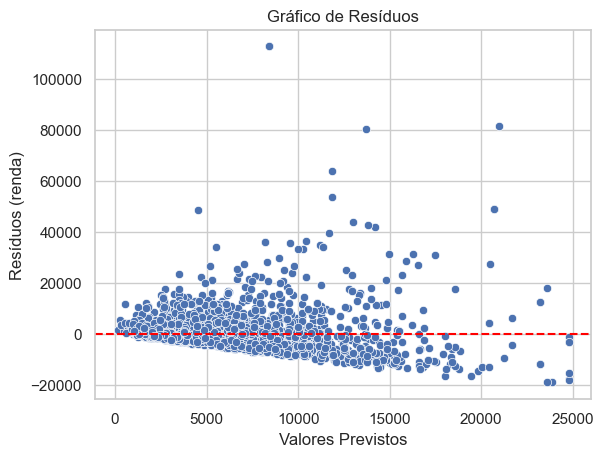

In [73]:
residuos_ridge = y_test - y_pred_ridge

sns.scatterplot(x=y_pred_ridge, y=residuos_ridge)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos (renda)')
plt.title('Gráfico de Resíduos')
plt.show()

#### Como visto no gráfico acima, alguns valores se distanciam bastante do esperado. Poderia ser feito uma análise em logaritimo para anilsar a correlação, mas como já foi feito os passos anteriores para essa verificação, então será feito um looping que faz um "corte" nos valores progressivamente e obtem um novo R², esse looping começa com um valor estabelecido e vai acrescentando e depois retorna o melhor R², dessa maneira será obtido o melhor resultado na remoção de outliers.

Para fazer essa analise será necessário o nome das variáveis explicativas e da variável resposta para ser passado no statsmodels e obter o R².

In [74]:
# Obtendo os nomes das colunas do DataFrame
colunas_explicativas = X.columns.tolist()
formula = 'renda ~ ' + ' + '.join(colunas_explicativas)
formula

'renda ~ posse_de_veiculo + posse_de_imovel + idade + tempo_emprego + qtd_filhos_0 + qtd_filhos_1 + qtd_filhos_14 + qtd_filhos_2 + qtd_filhos_3 + qtd_filhos_4 + qtd_filhos_5 + qtd_filhos_7 + tipo_renda_Assalariado + tipo_renda_Bolsista + tipo_renda_Empresário + tipo_renda_Pensionista + tipo_renda_Servidor_público + educacao_Primário + educacao_Pós_graduação + educacao_Secundário + educacao_Superior_completo + educacao_Superior_incompleto + estado_civil_Casado + estado_civil_Separado + estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + tipo_residencia_Aluguel + tipo_residencia_Casa + tipo_residencia_Com_os_pais + tipo_residencia_Comunitário + tipo_residencia_Estúdio + tipo_residencia_Governamental + qt_pessoas_residencia_1 + qt_pessoas_residencia_15 + qt_pessoas_residencia_2 + qt_pessoas_residencia_3 + qt_pessoas_residencia_4 + qt_pessoas_residencia_5 + qt_pessoas_residencia_6 + qt_pessoas_residencia_7 + qt_pessoas_residencia_9'

Os valores abaixo vão ser utilizados para serem percorridos e obter vários R², como é possível que tenha outliers para valores muito baixos, foi tirado valor de limite inferior, média e primeiro quartil para poder decidir por qual valor começar. Como o limite inferior é um valor muito baixo e a média já é um valor muito alto (devido aos próprios outliers), então foi utilizado o primeiro quartil como limite inferior.

In [75]:
# Verificando valor máximo e minimo de renda
limite_superior = df_model['renda'].max()
limite_inferior = df_model['renda'].min()
media_renda = df_model['renda'].mean()
primeiro_quartil = np.percentile(df_model['renda'], 25)
print(f'Limite superior: {limite_superior}\nLimite inferior: {limite_inferior}')
print(f'Media: {media_renda}\nPrimeiro quartil: {primeiro_quartil}')

Limite superior: 245141.67
Limite inferior: 118.71
Media: 5697.287056666667
Primeiro quartil: 2026.11


# Observação: O valor de num_pontos pode fazer com que a máquina calcule por muito tempo, decidir a quantidade com cautela

In [76]:
'''   Define o espaçamento dos dados, é a quantidade que eu 
tenho dividido pelo num_pontos, para não precisar pegar um por um.   '''
num_pontos = 1000
'''  O linspace cria uma lista de x numéros, onde x está sendo o num_pontos, esses números
são espaçados igualmente do valor minimo até o limite superior'''
limites_avaliados = np.linspace(primeiro_quartil, limite_superior, num_pontos) 
print(limites_avaliados)

[  2026.11         2269.46891892   2512.82783784   2756.18675676
   2999.54567568   3242.90459459   3486.26351351   3729.62243243
   3972.98135135   4216.34027027   4459.69918919   4703.05810811
   4946.41702703   5189.77594595   5433.13486486   5676.49378378
   5919.8527027    6163.21162162   6406.57054054   6649.92945946
   6893.28837838   7136.6472973    7380.00621622   7623.36513514
   7866.72405405   8110.08297297   8353.44189189   8596.80081081
   8840.15972973   9083.51864865   9326.87756757   9570.23648649
   9813.59540541  10056.95432432  10300.31324324  10543.67216216
  10787.03108108  11030.39        11273.74891892  11517.10783784
  11760.46675676  12003.82567568  12247.18459459  12490.54351351
  12733.90243243  12977.26135135  13220.62027027  13463.97918919
  13707.33810811  13950.69702703  14194.05594595  14437.41486486
  14680.77378378  14924.1327027   15167.49162162  15410.85054054
  15654.20945946  15897.56837838  16140.9272973   16384.28621622
  16627.64513514  16871.0

In [77]:
# Função para calcular o R² com base no ponto a ser passado
def calcular_r2(limite):
    df_filtrado = df_model[df_model['renda'] <= limite]
    reg_filtrado = smf.ols(formula, data=df_filtrado).fit()
    return reg_filtrado.rsquared

# Variável que vai guardar o melhor valor de R²
r2_otimo = 0.0
# Variável que vai guardar o melhor valor de limite da renda
limite_otimo = 0

''' O limite vão ser os valores criados anteriormente no limites_avaliados, para cada iteração
o R² vai ter um novo valor, esse valor é calculado na função calcular_r2 que faz um novo
DF que filtra os valores que estão acima do estabelecido, esse valor estabelecido é alterado
num_pontos vezes e cada iteração se guarda o melhor r² e o valor de corte.'''
for limite in limites_avaliados:
    r2 = calcular_r2(limite)
    if r2 > r2_otimo:
        r2_otimo = r2
        limite_otimo = limite

print("Melhor Limite Superior:", limite_otimo)
print("Melhor R²:", r2_otimo)

Melhor Limite Superior: 80144.322972973
Melhor R²: 0.1933395498096221


Após percorrer o looping num_pontos vezes e obter num_pontos R², foi obtido um R² muito melhor, já que tinha valores incrivelmente altos no conjunto de dados. Sendo assim vai ser tirado um novo ridge sem os outliers para verificar a diferença dos resultados.

Observação: Foi calculado com valor de num_pontos em 10000 e 1000 e não houve grande diferença, sinta-se livre para testar com valores de num_pontos diferentes para análisar o resultado.

In [78]:
df_model_cutted = df_model[df_model['renda']<=limite_otimo]
qt_dados = (df_model_cutted.shape[0]/df_model.shape[0])*100
print(f' Mesmo removendo os outliers, ainda ficamos com a grande maioria dos dados,\n ficando com {qt_dados:.2f}% dados contidos no novo dataFrame')

 Mesmo removendo os outliers, ainda ficamos com a grande maioria dos dados,
 ficando com 99.83% dados contidos no novo dataFrame


O processo abaixo é o mesmo que foi feito no momento do ridge, porém agora será usado o ridge com o conjunto de dados sem os outliers.

In [131]:
# Realizando nova divisão de dados com o novo Data Frame sem os outliers
X = df_model_cutted.drop(columns=['renda'])
y = df_model_cutted['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [80]:
''' Os valores de alpha que serão utilizados vão de 10 elevado a -6 e 6, nesse intervalo 1000 números serão
 selecionados espaçados igualmente entre eles'''
alphas = np.logspace(-6, 6, 1000)

In [81]:
ridge = Ridge() # Criando o Ridge
param_grid = {'alpha': alphas} # Guardando os valores de alpha

''' O valor de cv são chamados de folds, cada valor de alpha determinado no conjunto de dados do alphas
vai passar pelo cross-validation, no caso os dados vão ser divididos em 5 partes, 1 pra teste e 4 para 
treino, as partes vão se modificando até que cada parte tenha sido o teste uma vez, então serão feitas
5*1000 testes.
'''
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha'] # Atribuindo o melhor alpha ao best_alpha_ridge
best_score_ridge = grid_search_ridge.best_score_ # O score é o valor do R² que vem como padrão

# Obtenha o modelo com o melhor valor de alpha (o melhor grid_search)
best_model_ridge = grid_search_ridge.best_estimator_

# Acesse os coeficientes das variáveis
coeficientes_ridge = best_model_ridge.coef_

''' Está sendo percorrido as colunas de X_train e mostrando a variável(coluna) e o
coeficientes do melhor alpha usado pelo ridge'''
for col, coef in zip(X_train.columns, coeficientes_ridge):
    print(f"Variável: {col}, Coeficiente: {coef}")

print(f"Melhor alpha: {best_alpha_ridge}")
print(f"Melhor score de validação cruzada: {best_score_ridge}")

Variável: posse_de_veiculo, Coeficiente: 1627.9504730764288
Variável: posse_de_imovel, Coeficiente: 256.79775530415736
Variável: idade, Coeficiente: 16.602460899365614
Variável: tempo_emprego, Coeficiente: 430.4449145463175
Variável: qtd_filhos_0, Coeficiente: -45.30359725127398
Variável: qtd_filhos_1, Coeficiente: -211.17226094902043
Variável: qtd_filhos_14, Coeficiente: -31.67079932844646
Variável: qtd_filhos_2, Coeficiente: 401.4357142802251
Variável: qtd_filhos_3, Coeficiente: -165.2232137352209
Variável: qtd_filhos_4, Coeficiente: 72.81007159343156
Variável: qtd_filhos_5, Coeficiente: 13.546154020363366
Variável: qtd_filhos_7, Coeficiente: -34.42206863071383
Variável: tipo_renda_Assalariado, Coeficiente: -529.1419607427023
Variável: tipo_renda_Bolsista, Coeficiente: -99.66389729765301
Variável: tipo_renda_Empresário, Coeficiente: 18.826269090079574
Variável: tipo_renda_Pensionista, Coeficiente: 913.9972812696766
Variável: tipo_renda_Servidor_público, Coeficiente: -304.017692320772

In [82]:
# Fazendo predições usando o modelo treinado com o melhor alpha
y_pred_ridge = best_model_ridge.predict(X_test)

# Calculando o R² nos dados de teste
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² nos dados de teste: {r2_ridge}")

# Calculando o erro médio quadrático nos dados de teste
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Erro médio quadrático nos dados de teste: {mse_ridge}")

R² nos dados de teste: 0.18833354202378738
Erro médio quadrático nos dados de teste: 35410012.03674533


Os valores de treino ficaram um pouco melhor do que o de teste, o que pode ser meio inesperado, mas os valores são muito próximos, então se esse teste for executado mais vezes com "estados" diferentes do qual foi selecionado acima (random_state=99) eventualmente o treino vai ficar maior que o teste e vice-versa, o que é muito bom, porque mostra que os dados de teste estão explicando quase que na mesma proporção que o treino explica, além disso os valores de R² melhoraram, tendo em vista que o resultado obtido no statsmodel após remover os outliers não separaram os dados em treino e teste e também não faz os testes com validação cruzada e foi usado apenas para poder comparar com o primeiro modelo criado inicialmente nessa analise.

### Random Forest

#### O uso do algoritmo Random Forest em combinação com a validação cruzada (cross-validation) e a busca em grade (grid search) oferece vários benefícios importantes na construção de modelos de machine learning. 

#### O algorítimo de decisão de arvore verifica a entropia e peso da importância dos dados e então cada variável é classificada com seu grau de relevância para a solução do problema, no caso o valor da renda; A raiz da árvore é a variável com maior relevância e são feitas uma séria de decisões ao se aprofundar na árvore até que chegue na folha, a qual é o resultado final. 

#### A árvore de decisão ainda assim pode ser melhorada ao alterar seus parâmetros, no caso abaixo está sendo alterado sua profundidade máxima, número de amostras mínimas e número de árvores utilizadas, essa "poda" ajuda a evitar o uso de variáveis não tão relevantes e o aumento de árvores deixa o processo mais robusto, pois o resultado vai ser a média de todas árvores usadas.

#### Está sendo usado também a validação cruzada como nos outros casos, que faz com que além de dividir os dados entre treino e teste, esses valores se alternem de maneira randomica k vezes (no caso abaixo 5 vezes). Sendo assim, como no uso de varias arvores, ao dividir os testes varias vezes, os testes são feitos k vezes e seu resultado é uma média desses valores. Isso evita com que por aleatoriedade um conjunto de valores dê um resultado enviesado. 

In [149]:
# Criando a árvore de regressão
arvore_reg = DecisionTreeRegressor(random_state = 99)
# Ajustando a árvore de regressão com os dados de treino
arvore_reg.fit(X_train, y_train)

# Predição dos dados de treino e teste
y_pred_train = arvore_reg.predict(X_train)
y_pred_test = arvore_reg.predict(X_test)

# Comparando com o "gabarito" para calcular o R²
r2_treino = r2_score(y_train, y_pred_train)
r2_teste = r2_score(y_test, y_pred_test)

print(f"R² treino: {r2_treino}\nR² teste: {r2_teste}")

R² treino: 0.785272426950876
R² teste: 0.17244875007466032


Apenas utilizando uma arvore de decisão, os resultados de treino ficaram muito ajustados, obviamente está com overfitting apesar do resultado de R² melhor que os modelos anteriores. Para melhorar esse resultado, será usado mais de uma arvore e seus hiperparametros vão ser ajustados, ou seja, vão ser colocados limites para a quantidade de processos que as arvores vão fazer e calcular seu resultado para cada ponto ótimo alcançado.

In [139]:
# Declarando uma variável para obter informações da árvore de regressão já criada
arvore_infos = arvore_reg.tree_

# Obtendo a profundidade máxima da árvore
profundidade_maxima = arvore_infos.max_depth
profundidade_maxima

31

In [140]:
'''Para se ajustar o minimo de amostras de uma maneira proporcional, 
será passado os valores em porcentagem'''
# Guardando o tamanho total de amostras no amostras_total
amostras_total = len(X_train)
# Definindo o minimo da faixa de valores de amostras a ser aceito na arvore
samples_minimo = int(amostras_total * 0.01) # Definindo em 1%
# Definindo o máximo da faixa de valores de amostras a ser aceita na arvore
samples_maximo = int(amostras_total * 0.10) #Definindo em 10%


# Definir os hiperparâmetros e suas faixas de busca
parametros = {
    'max_depth': (1, profundidade_maxima), # Faixa de valores da profundidade máxima
    'min_samples_split': (samples_minimo, samples_maximo), # Faixa de valores do minimo de amostras aceita na arvore
}

parametros

{'max_depth': (1, 31), 'min_samples_split': (112, 1123)}

Como o aumento do valor de R² quase sempre vai melhorar ao aumentar o número de árvores, será colocado o valor minimo de ganho, que será o ganho_minimo_r2, caso o ganho mínimo não seja o bastante definido por {ganho_minimo_r2}, então o processo será interrompido e será decidido que a quantidaded de árvores usadas é o suficiente, definido por {n_estimators}.

In [160]:
# Criando um randomForest
n_estimators = 1 # Número inicial de árvores
arvores = RandomForestRegressor(n_estimators=n_estimators, random_state=99)

''' Aqui é feito a busca dos melhores parametros da mesma forma que foi feito no Lasso e Ridge
os dados são divididos em 5 partes e o shuffle=True garante que vão ser embaralhados. Isso é
repetido para cada árvore'''
grid_search = GridSearchCV(arvores, parametros, cv=KFold(n_splits=5, shuffle=True), scoring='r2')
grid_search.fit(X_train, y_train)
# Melhores hiperparâmetros encontrados para o número inicial de árvores
melhor_modelo = grid_search.best_estimator_
y_pred_train = melhor_modelo.predict(X_train)
y_pred_test = melhor_modelo.predict(X_test)
r2_treino = r2_score(y_train, y_pred_train)
r2_teste = r2_score(y_test, y_pred_test)
print(f'R² treino para a quantidade inicial de árvores: {r2_treino}')
print(f'R² teste para a quantidade inicial de árvores: {r2_teste}')



R² treino para a quantidade inicial de árvores: 0.2715923470155678
R² teste para a quantidade inicial de árvores: 0.14655436789744103


Eu esperava um resultado com uma única árvore mais parecida com o DecisionTreeRegressor, procurei estudar o por quê isso acontece e não cheguei a uma conclusão clara, se por ventura alguém tiver uma resposta para isso e puder me contactar, ficarei muito feliz!

In [171]:
old_r2 = 0 # variável para guardar o valor de R² no laço
ganho_minimo_r2 = 0.000000000001 # Valor estipulado para o R² aumentar, do contrário o laço acaba
aumento_arvore = 1 # Numero de árvores adicionadas a cada ganho de R² do laço
''' Enquanto o novo valor for maior que o antigo mais o ganho minimo, o numero de arvores vai aumentar
em aumento_arvores vezes.'''
while r2_teste > old_r2 + ganho_minimo_r2: 
    old_r2 = r2_teste
    n_estimators+=aumento_arvore
    ### Dentro desse comentário faz o processo de gridsearch e crossvalidation, além de treinar o modelo
    arvores = RandomForestRegressor(n_estimators=n_estimators, random_state=99)
    grid_search = GridSearchCV(arvores, parametros, cv=KFold(n_splits=5, shuffle=True), scoring='r2')
    grid_search.fit(X_train, y_train)
    ###
    melhor_modelo = grid_search.best_estimator_ # Salvando melhor modelo
    y_pred = melhor_modelo.predict(X_test) # Obtendo as predições do melhor modelo
    r2_teste = r2_score(y_test, y_pred) # Obtendo o novo R² com base nas predições e respostas

In [172]:
melhor_max_depth = melhor_modelo.get_params()['max_depth']
melhor_min_samples_split = melhor_modelo.get_params()['min_samples_split']
r2_teino = grid_search.best_score_

print(f'Melhor quantidade de folhas minimas: {melhor_min_samples_split}')
print(f'Melhor profundidade: {melhor_max_depth}')
print(f'Melhor quantidade de árvores: {n_estimators}')
print(f'Melhor R² treino: {r2_teino}')
print(f'Melhor R² teste: {r2_teste}')

Melhor quantidade de folhas minimas: 112
Melhor profundidade: 31
Melhor quantidade de árvores: 16
Melhor R² treino: 0.2502043048414332
Melhor R² teste: 0.2362163341968232


# Conclusões

Diversas vezes o maior desafio foi o entendimento abstrato do que se fazer com os dados e não apenas executar uma linha de código, dúvidas de se um valor extremo deve ser removido ou não, de qual modelo usar em cada situação ou até se o resultado é confiável ou não.

Ao decorrer do projeto procurei usar diversas abordagens e metodologias que fossem robustas como a validação cruzada para comparação com diferentes porções de dados e a grid-search para busca do melhor hiperparâmetro. Assim como procurei também justificar o aumento de processamento em comparação com os recursos computacionais, como feito na limitação de aumento de árvores no Random Forest.

Sendo assim, o modelo que obteve os melhores resultados foi o Random Forest usando apenas 16 árvores, sendo que uma quantidade maior de árvores não teria um ganho de R² que justificasse. Deve ser levado em consideração que o R² é apenas um dos valores que servem para estimar o quão bem o modelo explica os resultados e que além dos modelos abordados nesse projeto existem diversos outros que podem ter um resultado satisfatório. Além disso os resultados podem alterar completamente dependendo de como se é tratado os dados nas etapas iniciais, como a forma que é tratado os valores ausentes ou os valores extremos.

Feito essas colocações, caso tenha acompanhado esse estudo e tenha algo a acrescentar/modificar, deixei meu linkedIn abaixo do título do projeto e caso não tenha entendi alguma etapa também ficaria muito feliz de explicar.